### Initial Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/dataset_split.zip" -d "/content/"


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset_split/train/chordata_percidae/2702993_211786_eol-full-size-copy.jpg  
  inflating: /content/dataset_split/train/chordata_percidae/2702994_211786_eol-full-size-copy.jpg  
  inflating: /content/dataset_split/train/chordata_percidae/2702995_211786_eol-full-size-copy.jpg  
  inflating: /content/dataset_split/train/chordata_percidae/2702998_211786_eol-full-size-copy.jpg  
  inflating: /content/dataset_split/train/chordata_percidae/2703001_211786_eol-full-size-copy.jpg  
  inflating: /content/dataset_split/train/chordata_percidae/28479013_211786_eol-full-size-copy.jpg  
  inflating: /content/dataset_split/train/chordata_percidae/29882896_211786_eol-full-size-copy.jpg  
   creating: /content/dataset_split/train/chordata_phasianidae/
  inflating: /content/dataset_split/train/chordata_phasianidae/15267496_45516020_eol-full-size-copy.jpg  
  inflating: /content/dataset_split/train/chordata_phasianidae/15267497_45516

## Imports

In [3]:
#tensorFlow core
import tensorflow as tf

#dataset utility
from tensorflow.keras.utils import image_dataset_from_directory

#ConvNext
from tensorflow.keras.applications import ConvNeXtBase

#model building
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
)

#optimizers and regularization
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.regularizers import l2

# Losses
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Callbacks
from tensorflow.keras.callbacks import (
    EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
)

#to save history
import pickle

#to plot history
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, accuracy_score, top_k_accuracy_score
import numpy as np

In [4]:
import sys
sys.path.append('/content/drive/MyDrive/dl_run')

import library
from library import *

## Data Loading

Batch = 8

In [5]:
base_path = "/content/dataset_split"

train_batch8 = tf.keras.utils.image_dataset_from_directory(
    directory=f"{base_path}/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=8,
    image_size=(224, 224),
    shuffle=True,
    seed=42
)

val_batch8 = tf.keras.utils.image_dataset_from_directory(
    directory=f"{base_path}/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=8,
    image_size=(224, 224),
    shuffle=False,
    seed=42
)

test_batch8 = tf.keras.utils.image_dataset_from_directory(
    directory=f"{base_path}/test",
    labels="inferred",
    label_mode="categorical",
    batch_size=8,
    image_size=(224, 224),
    shuffle=False,
    seed=42
)

Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 1798 files belonging to 202 classes.


Batch = 16

In [6]:
train_batch16 = tf.keras.utils.image_dataset_from_directory(
    directory=f"{base_path}/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=16,
    image_size=(224, 224),
    shuffle=True,
    seed=42
)

val_batch16 = tf.keras.utils.image_dataset_from_directory(
    directory=f"{base_path}/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=16,
    image_size=(224, 224),
    shuffle=False,
    seed=42
)

test_batch16 = tf.keras.utils.image_dataset_from_directory(
    directory=f"{base_path}/test",
    labels="inferred",
    label_mode="categorical",
    batch_size=16,
    image_size=(224, 224),
    shuffle=False,
    seed=42
)

Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 1798 files belonging to 202 classes.


Batch = 32

In [7]:
train_batch32 = tf.keras.utils.image_dataset_from_directory(
    directory=f"{base_path}/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42
)

val_batch32 = tf.keras.utils.image_dataset_from_directory(
    directory=f"{base_path}/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=42
)

test_batch32 = tf.keras.utils.image_dataset_from_directory(
    directory=f"{base_path}/test",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=42
)



Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 1798 files belonging to 202 classes.


Batch = 64

In [8]:
train_batch64 = tf.keras.utils.image_dataset_from_directory(
    directory=f"{base_path}/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=64,
    image_size=(224, 224),
    shuffle=True,
    seed=42
)

val_batch64 = tf.keras.utils.image_dataset_from_directory(
    directory=f"{base_path}/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=64,
    image_size=(224, 224),
    shuffle=False,
    seed=42
)

test_batch64 = tf.keras.utils.image_dataset_from_directory(
    directory=f"{base_path}/test",
    labels="inferred",
    label_mode="categorical",
    batch_size=64,
    image_size=(224, 224),
    shuffle=False,
    seed=42
)


Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 1798 files belonging to 202 classes.


In [9]:
n_classes = len(train_batch8.class_names)
print(f"number of classes: {n_classes}")


number of classes: 202


In [10]:
train_batch8 = train_batch8.prefetch(tf.data.AUTOTUNE)
val_batch8 = val_batch8.prefetch(tf.data.AUTOTUNE)
test_batch8 = test_batch8.prefetch(tf.data.AUTOTUNE)

train_batch16 = train_batch16.prefetch(tf.data.AUTOTUNE)
val_batch16 = val_batch16.prefetch(tf.data.AUTOTUNE)
test_batch16 = test_batch16.prefetch(tf.data.AUTOTUNE)

train_batch32 = train_batch32.prefetch(tf.data.AUTOTUNE)
val_batch32 = val_batch32.prefetch(tf.data.AUTOTUNE)
test_batch32 = test_batch32.prefetch(tf.data.AUTOTUNE)

train_batch64 = train_batch64.prefetch(tf.data.AUTOTUNE)
val_batch64 = val_batch64.prefetch(tf.data.AUTOTUNE)
test_batch64 = test_batch64.prefetch(tf.data.AUTOTUNE)


## Callbacks

In [11]:
callbacks_head = [
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=1),
    EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True, verbose=1),
]


## Metrics Definition

In [12]:
TopKCategoricalAccuracy = tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5_accuracy')

f1_macro = tf.keras.metrics.F1Score(average='macro', name='f1_macro')

f1_weighted = tf.keras.metrics.F1Score(average='weighted', name='f1_weighted')


In [ ]:
# def get_classes(y_true_one_hot, y_pred_probs):
#     y_true = np.argmax(y_true_one_hot, axis=1)
#     y_pred = np.argmax(y_pred_probs, axis=1)
#     return y_true, y_pred

# def compute_accuracy(y_true_one_hot, y_pred_probs):
#     y_true, y_pred = get_classes(y_true_one_hot, y_pred_probs)
#     return accuracy_score(y_true, y_pred)

# def compute_f1_macro(y_true_one_hot, y_pred_probs):
#     y_true, y_pred = get_classes(y_true_one_hot, y_pred_probs)
#     return f1_score(y_true, y_pred, average='macro')

# def compute_f1_weighted(y_true_one_hot, y_pred_probs):
#     y_true, y_pred = get_classes(y_true_one_hot, y_pred_probs)
#     return f1_score(y_true, y_pred, average='weighted')

# def compute_top5_accuracy(y_true_one_hot, y_pred_probs):
#     y_true = np.argmax(y_true_one_hot, axis=1)
#     return top_k_accuracy_score(y_true, y_pred_probs, k=5)

## Plot Funcion

In [ ]:
# def plot_allmetrics(history, title="Training Metrics"):
#     metrics = [m for m in history.history.keys() if not m.startswith('val')]

#     epochs = range(1, len(history.history[metrics[0]]) + 1)
#     num_metrics = len(metrics)

#     cols = 2
#     rows = (num_metrics + 1) // cols

#     plt.figure(figsize=(cols * 6, rows * 4))
#     plt.suptitle(title, fontsize=16)

#     for i, metric in enumerate(metrics):
#         plt.subplot(rows, cols, i + 1)
#         plt.plot(epochs, history.history[metric], label=f'Train {metric}')

#         val_metric = 'val_' + metric  # <- fix aqui
#         if val_metric in history.history:
#             plt.plot(epochs, history.history[val_metric], label=f'Val {metric}')

#         plt.title(metric.replace("_", " ").title())
#         plt.xlabel("Epoch")
#         plt.ylabel(metric)
#         plt.legend()

#     plt.tight_layout(rect=[0, 0, 1, 0.97])
#     plt.show()



## Building the models with functions

### MiniConvNext

In [ ]:
def MiniConvNext(n_classes, train_dataset, val_dataset, epochs=13, callbacks=None):

    base_model = ConvNeXtBase(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
    base_model.trainable = False

    inputs = Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(n_classes, activation="softmax")(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=AdamW(1e-4, weight_decay=3e-4), loss="categorical_crossentropy", metrics=["accuracy", TopKCategoricalAccuracy, f1_macro, f1_weighted])

    history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs, callbacks=callbacks)

    return model, history

### ConvNextDropout

In [ ]:
def ConvNextDropout(n_classes, train_dataset, val_dataset, epochs=13, callbacks=None):

    base_model = ConvNeXtBase(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
    base_model.trainable = False

    inputs = Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    outputs = Dense(n_classes, activation="softmax")(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=AdamW(1e-4, weight_decay=3e-4), loss="categorical_crossentropy", metrics=["accuracy", TopKCategoricalAccuracy, f1_macro, f1_weighted])

    history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs, callbacks=callbacks)

    return model, history

### ConvNextMid

In [ ]:
def ConvNextMid(n_classes, train_dataset, val_dataset, epochs=13, callbacks=None):

    base_model = ConvNeXtBase(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
    base_model.trainable = False

    inputs = Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    outputs = Dense(n_classes, activation="softmax")(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=AdamW(1e-4, weight_decay=3e-4), loss="categorical_crossentropy", metrics=["accuracy", TopKCategoricalAccuracy, f1_macro, f1_weighted])

    history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs, callbacks=callbacks)

    return model, history

### ConvNextFull


In [13]:
def ConvNextFull(n_classes, train_dataset, val_dataset, epochs=13, callbacks=None):

    base_model = ConvNeXtBase(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
    base_model.trainable = False

    inputs = Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)

    x = Dense(1024, activation="gelu", kernel_regularizer=l2(0.002))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Dense(512, activation="gelu", kernel_regularizer=l2(0.002))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    outputs = Dense(n_classes, activation="softmax")(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=AdamW(1e-4, weight_decay=3e-4), loss="categorical_crossentropy", metrics=["accuracy", TopKCategoricalAccuracy, f1_macro, f1_weighted])

    history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs, callbacks=callbacks)

    return model, history

## Batch = 8

### MiniConvNext

In [ ]:
model_miniconvnext_batch8, history_miniconvnext_batch8 = MiniConvNext(n_classes, train_batch8, val_batch8, epochs=13, callbacks=callbacks_head)


350926856/350926856 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step
Epoch 1/13
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 91s 54ms/step - accuracy: 0.1195 - f1_macro: 0.0610 - f1_weighted: 0.1090 - loss: 4.7885 - top_5_accuracy: 0.2320 - val_accuracy: 0.4808 - val_f1_macro: 0.3282 - val_f1_weighted: 0.4173 - val_loss: 2.9771 - val_top_5_accuracy: 0.7284 - learning_rate: 1.0000e-04
Epoch 2/13
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.5291 - f1_macro: 0.3857 - f1_weighted: 0.4764 - loss: 2.6016 - top_5_accuracy: 0.7878 - val_accuracy: 0.6205 - val_f1_macro: 0.5155 - val_f1_weighted: 0.5765 - val_loss: 1.9854 - val_top_5_accuracy: 0.8642 - learning_rate: 1.0000e-04
Epoch 3/13
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.6676 - f1_macro: 0.5726 - f1_weighted: 0.6399 - loss: 1.7199 - top_5_accuracy: 0.9070 - val_accuracy: 0.6912 - val_f1_macro: 0.6203 - val_f1_weighted: 0.6630 - val_loss: 1.5253 - val_top_5_accuracy: 0.9032 - learning_rate: 1.0000e-04
Epoch 4/13
1049/1049 ━━━━━━━━━━━━━

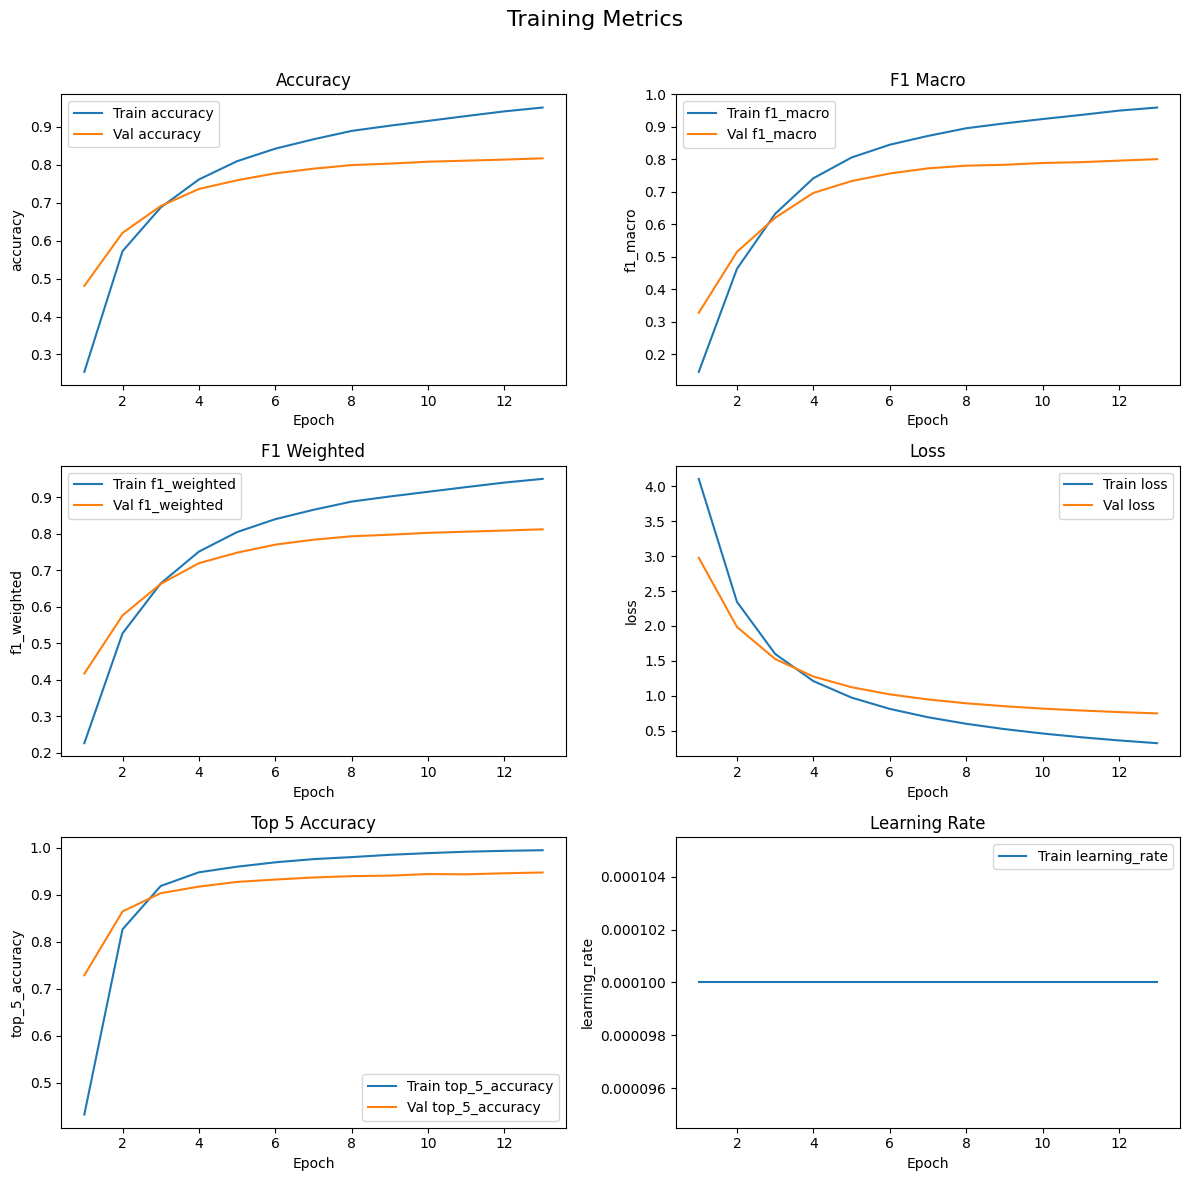

In [ ]:
plot_allmetrics(history_miniconvnext_batch8)

Evaluate on test

In [ ]:
y_true_test_miniconvnext_batch8 = []
y_pred_probs_test_miniconvnext_batch8 = []

for x_batch, y_batch in test_batch8:
    preds = model_miniconvnext_batch8.predict(x_batch, verbose=0)
    y_pred_probs_test_miniconvnext_batch8.append(preds)
    y_true_test_miniconvnext_batch8.append(y_batch.numpy())

y_true_test_miniconvnext_batch8 = np.concatenate(y_true_test_miniconvnext_batch8, axis=0)
y_pred_probs_test_miniconvnext_batch8 = np.concatenate(y_pred_probs_test_miniconvnext_batch8, axis=0)

In [ ]:
acc_test = compute_accuracy(y_true_test_miniconvnext_batch8, y_pred_probs_test_miniconvnext_batch8)
f1_macro_test = compute_f1_macro(y_true_test_miniconvnext_batch8, y_pred_probs_test_miniconvnext_batch8)
f1_weighted_test = compute_f1_weighted(y_true_test_miniconvnext_batch8, y_pred_probs_test_miniconvnext_batch8)
top5_acc_test = compute_top5_accuracy(y_true_test_miniconvnext_batch8, y_pred_probs_test_miniconvnext_batch8)

print(f"Test Accuracy: {acc_test:.4f}")
print(f"Test F1 Macro: {f1_macro_test:.4f}")
print(f"Test F1 Weighted: {f1_weighted_test:.4f}")
print(f"Test Top-5 Accuracy: {top5_acc_test:.4f}")

Test Accuracy: 0.8170
Test F1 Macro: 0.8017
Test F1 Weighted: 0.8119
Test Top-5 Accuracy: 0.9416


### ConvNextDropout

In [ ]:
model_convnextdropout_batch8, history_convnextdropout_batch8 = ConvNextDropout(n_classes, train_batch8, val_batch8, epochs=13, callbacks=callbacks_head)


Epoch 1/13
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 63s 39ms/step - accuracy: 0.0797 - f1_macro: 0.1235 - f1_weighted: 0.1915 - loss: 4.9916 - top_5_accuracy: 0.3753 - val_accuracy: 0.4385 - val_f1_macro: 0.2522 - val_f1_weighted: 0.3599 - val_loss: 3.2439 - val_top_5_accuracy: 0.6611 - learning_rate: 1.0000e-04
Epoch 2/13
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.4397 - f1_macro: 0.2840 - f1_weighted: 0.3816 - loss: 2.9912 - top_5_accuracy: 0.6810 - val_accuracy: 0.5665 - val_f1_macro: 0.4249 - val_f1_weighted: 0.5083 - val_loss: 2.2282 - val_top_5_accuracy: 0.8208 - learning_rate: 1.0000e-04
Epoch 3/13
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.5994 - f1_macro: 0.4868 - f1_weighted: 0.5643 - loss: 2.0529 - top_5_accuracy: 0.8514 - val_accuracy: 0.6477 - val_f1_macro: 0.5583 - val_f1_weighted: 0.6100 - val_loss: 1.7158 - val_top_5_accuracy: 0.8826 - learning_rate: 1.0000e-04
Epoch 4/13
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.6857 - f1_macro: 0

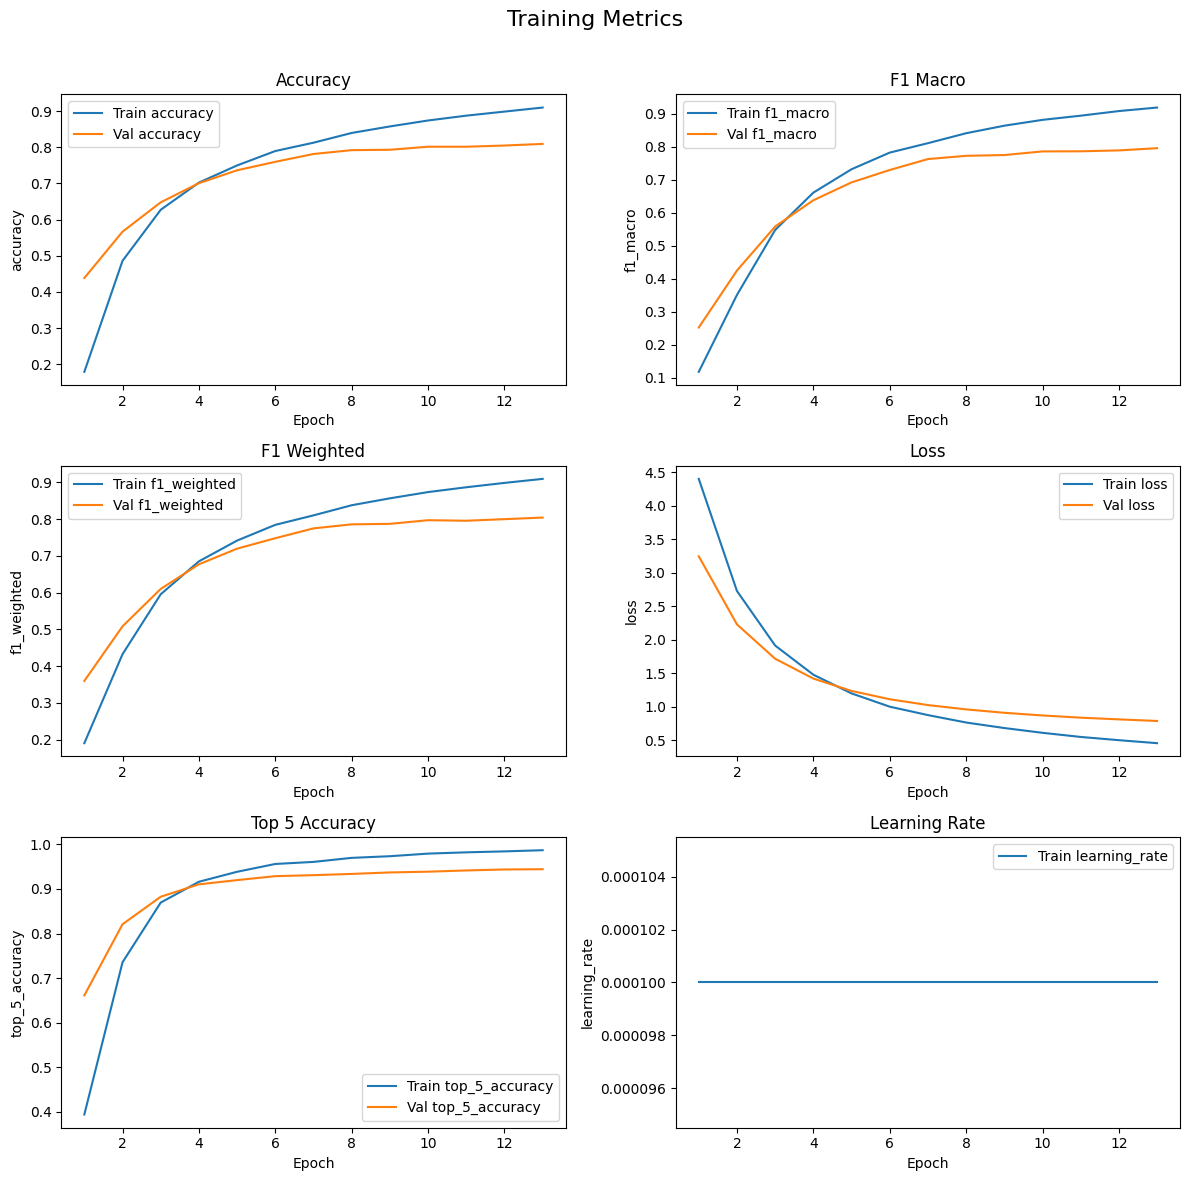

In [ ]:
plot_allmetrics(history_convnextdropout_batch8)

Evaluate on test

In [ ]:
y_true_test_convnextdropout_batch8 = []
y_pred_probs_test_convnextdropout_batch8 = []

for x_batch, y_batch in test_batch8:
    preds = model_convnextdropout_batch8.predict(x_batch, verbose=0)
    y_pred_probs_test_convnextdropout_batch8.append(preds)
    y_true_test_convnextdropout_batch8.append(y_batch.numpy())

y_true_test_convnextdropout_batch8 = np.concatenate(y_true_test_convnextdropout_batch8, axis=0)
y_pred_probs_test_convnextdropout_batch8 = np.concatenate(y_pred_probs_test_convnextdropout_batch8, axis=0)

In [ ]:
acc_test = compute_accuracy(y_true_test_convnextdropout_batch8, y_pred_probs_test_convnextdropout_batch8)
f1_macro_test = compute_f1_macro(y_true_test_convnextdropout_batch8, y_pred_probs_test_convnextdropout_batch8)
f1_weighted_test = compute_f1_weighted(y_true_test_convnextdropout_batch8, y_pred_probs_test_convnextdropout_batch8)
top5_acc_test = compute_top5_accuracy(y_true_test_convnextdropout_batch8, y_pred_probs_test_convnextdropout_batch8)

print(f"Test Accuracy: {acc_test:.4f}")
print(f"Test F1 Macro: {f1_macro_test:.4f}")
print(f"Test F1 Weighted: {f1_weighted_test:.4f}")
print(f"Test Top-5 Accuracy: {top5_acc_test:.4f}")

Test Accuracy: 0.8087
Test F1 Macro: 0.7960
Test F1 Weighted: 0.8041
Test Top-5 Accuracy: 0.9416


### ConvNextMid

In [ ]:
model_convnextmid_batch8, history_convnextmid_batch8 = ConvNextMid(n_classes, train_batch8, val_batch8, epochs=13, callbacks=callbacks_head)

Epoch 1/13
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 71s 43ms/step - accuracy: 0.0875 - f1_macro: 0.3098 - f1_weighted: 0.3727 - loss: 5.1616 - top_5_accuracy: 0.4707 - val_accuracy: 0.4502 - val_f1_macro: 0.2776 - val_f1_weighted: 0.3916 - val_loss: 2.7932 - val_top_5_accuracy: 0.6739 - learning_rate: 1.0000e-04
Epoch 2/13
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.4342 - f1_macro: 0.2688 - f1_weighted: 0.3971 - loss: 2.8736 - top_5_accuracy: 0.6401 - val_accuracy: 0.5915 - val_f1_macro: 0.4601 - val_f1_weighted: 0.5455 - val_loss: 1.8893 - val_top_5_accuracy: 0.8280 - learning_rate: 1.0000e-04
Epoch 3/13
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.5826 - f1_macro: 0.4509 - f1_weighted: 0.5551 - loss: 2.0042 - top_5_accuracy: 0.8046 - val_accuracy: 0.6694 - val_f1_macro: 0.5766 - val_f1_weighted: 0.6394 - val_loss: 1.4596 - val_top_5_accuracy: 0.8826 - learning_rate: 1.0000e-04
Epoch 4/13
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.6701 - f1_macro: 0

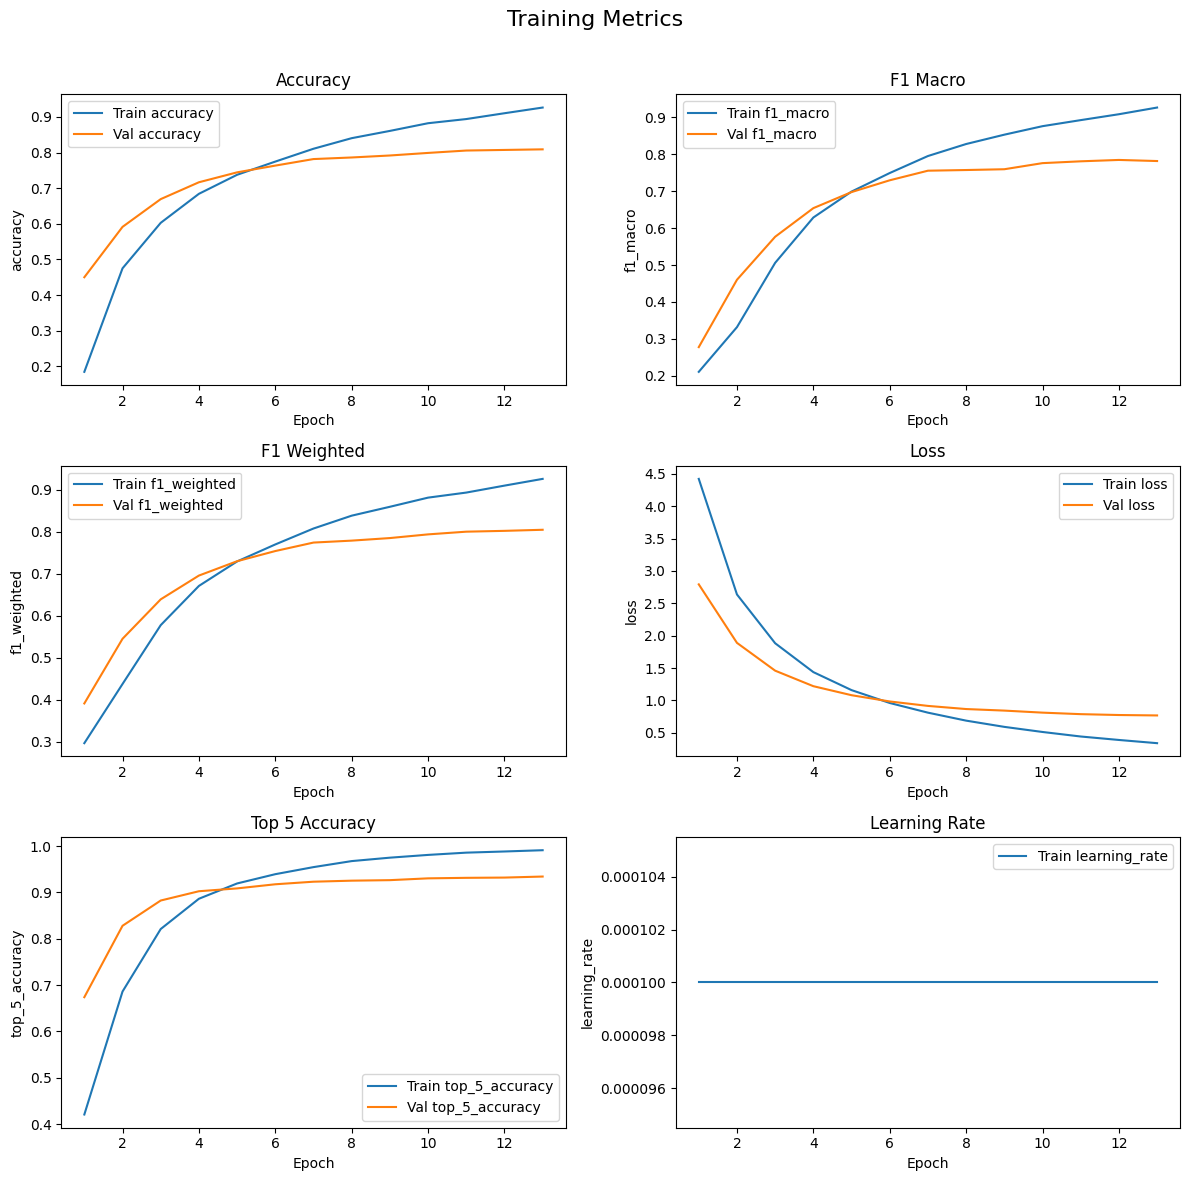

In [ ]:
plot_allmetrics(history_convnextmid_batch8)

Evaluate on test

In [ ]:
y_true_test_convnextmid_batch8 = []
y_pred_probs_test_convnextmid_batch8 = []

for x_batch, y_batch in test_batch8:
    preds = model_convnextmid_batch8.predict(x_batch, verbose=0)
    y_pred_probs_test_convnextmid_batch8.append(preds)
    y_true_test_convnextmid_batch8.append(y_batch.numpy())

y_true_test_convnextmid_batch8 = np.concatenate(y_true_test_convnextmid_batch8, axis=0)
y_pred_probs_test_convnextmid_batch8 = np.concatenate(y_pred_probs_test_convnextmid_batch8, axis=0)

In [ ]:
acc_test = compute_accuracy(y_true_test_convnextmid_batch8, y_pred_probs_test_convnextmid_batch8)
f1_macro_test = compute_f1_macro(y_true_test_convnextmid_batch8, y_pred_probs_test_convnextmid_batch8)
f1_weighted_test = compute_f1_weighted(y_true_test_convnextmid_batch8, y_pred_probs_test_convnextmid_batch8)
top5_acc_test = compute_top5_accuracy(y_true_test_convnextmid_batch8, y_pred_probs_test_convnextmid_batch8)

print(f"Test Accuracy: {acc_test:.4f}")
print(f"Test F1 Macro: {f1_macro_test:.4f}")
print(f"Test F1 Weighted: {f1_weighted_test:.4f}")
print(f"Test Top-5 Accuracy: {top5_acc_test:.4f}")

Test Accuracy: 0.7953
Test F1 Macro: 0.7706
Test F1 Weighted: 0.7918
Test Top-5 Accuracy: 0.9349


### ConvNextFull

In [ ]:
model_convnextfull_batch8, history_convnextfull_batch8 = ConvNextFull(n_classes, train_batch8, val_batch8, epochs=13, callbacks=callbacks_head)

Epoch 1/13
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 157s 124ms/step - accuracy: 0.1045 - f1_macro: 0.3107 - f1_weighted: 0.3800 - loss: 8.7350 - top_5_accuracy: 0.4836 - val_accuracy: 0.5543 - val_f1_macro: 0.4000 - val_f1_weighted: 0.4981 - val_loss: 5.5033 - val_top_5_accuracy: 0.7757 - learning_rate: 1.0000e-04
Epoch 2/13
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 115s 110ms/step - accuracy: 0.4310 - f1_macro: 0.2705 - f1_weighted: 0.4018 - loss: 6.0406 - top_5_accuracy: 0.6461 - val_accuracy: 0.6461 - val_f1_macro: 0.5376 - val_f1_weighted: 0.6109 - val_loss: 4.7377 - val_top_5_accuracy: 0.8765 - learning_rate: 1.0000e-04
Epoch 3/13
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 115s 109ms/step - accuracy: 0.5536 - f1_macro: 0.4322 - f1_weighted: 0.5335 - loss: 5.1760 - top_5_accuracy: 0.7868 - val_accuracy: 0.7101 - val_f1_macro: 0.6377 - val_f1_weighted: 0.6891 - val_loss: 4.3194 - val_top_5_accuracy: 0.9087 - learning_rate: 1.0000e-04
Epoch 4/13
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 114s 109ms/step - accuracy: 0.6454 - f1_

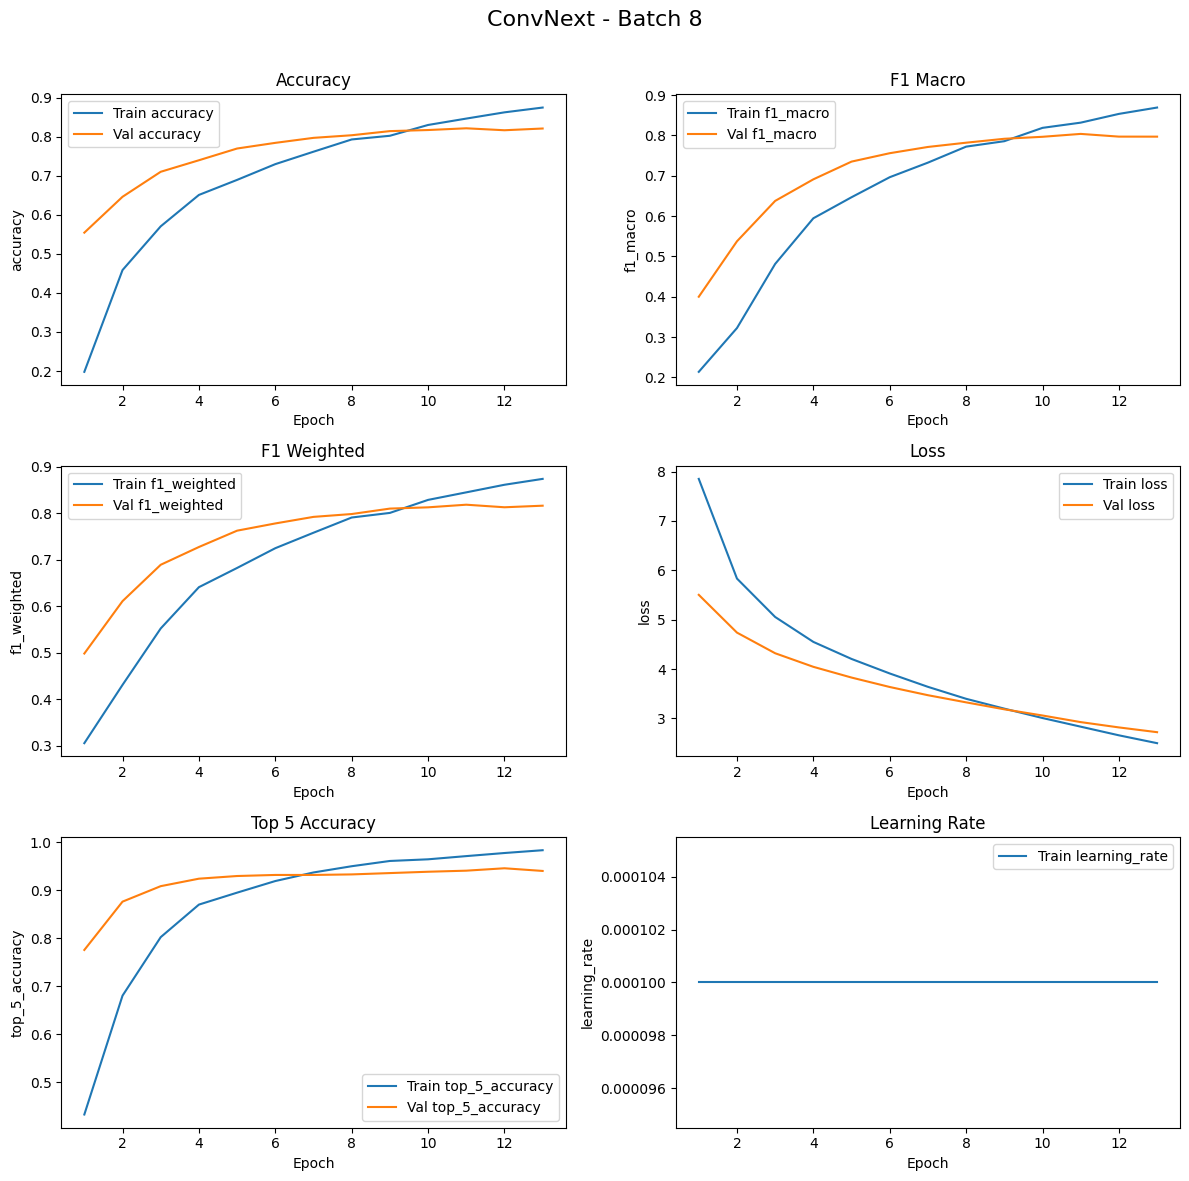

In [ ]:
plot_all_metrics(history_convnextfull_batch8, title="ConvNext - Batch 8")

Evaluate on test

In [ ]:
y_true_test_convnextfull_batch8 = []
y_pred_probs_test_convnextfull_batch8 = []

for x_batch, y_batch in test_batch8:
    preds = model_convnextfull_batch8.predict(x_batch, verbose=0)
    y_pred_probs_test_convnextfull_batch8.append(preds)
    y_true_test_convnextfull_batch8.append(y_batch.numpy())

y_true_test_convnextfull_batch8 = np.concatenate(y_true_test_convnextfull_batch8, axis=0)
y_pred_probs_test_convnextfull_batch8 = np.concatenate(y_pred_probs_test_convnextfull_batch8, axis=0)

In [ ]:
acc_test = compute_accuracy(y_true_test_convnextfull_batch8, y_pred_probs_test_convnextfull_batch8)
f1_macro_test = compute_f1_macro(y_true_test_convnextfull_batch8, y_pred_probs_test_convnextfull_batch8)
f1_weighted_test = compute_f1_weighted(y_true_test_convnextfull_batch8, y_pred_probs_test_convnextfull_batch8)
top5_acc_test = compute_top5_accuracy(y_true_test_convnextfull_batch8, y_pred_probs_test_convnextfull_batch8)

print(f"Test Accuracy: {acc_test:.4f}")
print(f"Test F1 Macro: {f1_macro_test:.4f}")
print(f"Test F1 Weighted: {f1_weighted_test:.4f}")
print(f"Test Top-5 Accuracy: {top5_acc_test:.4f}")

Test Accuracy: 0.8092
Test F1 Macro: 0.7902
Test F1 Weighted: 0.8060
Test Top-5 Accuracy: 0.9416


## Batch = 16

### MiniConvNext

In [ ]:
model_miniconvnext_batch16, history_miniconvnext_batch16 = MiniConvNext(n_classes, train_batch16, val_batch16, epochs=13, callbacks=callbacks_head)


Epoch 1/13
525/525 ━━━━━━━━━━━━━━━━━━━━ 70s 77ms/step - accuracy: 0.0979 - f1_macro: 0.3567 - f1_weighted: 0.3872 - loss: 4.9040 - top_5_accuracy: 0.4864 - val_accuracy: 0.3728 - val_f1_macro: 0.1989 - val_f1_weighted: 0.2996 - val_loss: 3.4861 - val_top_5_accuracy: 0.6155 - learning_rate: 1.0000e-04
Epoch 2/13
525/525 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.4285 - f1_macro: 0.2723 - f1_weighted: 0.3684 - loss: 3.1162 - top_5_accuracy: 0.7043 - val_accuracy: 0.5387 - val_f1_macro: 0.3916 - val_f1_weighted: 0.4756 - val_loss: 2.4736 - val_top_5_accuracy: 0.8075 - learning_rate: 1.0000e-04
Epoch 3/13
525/525 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.6016 - f1_macro: 0.4890 - f1_weighted: 0.5643 - loss: 2.1913 - top_5_accuracy: 0.8684 - val_accuracy: 0.6249 - val_f1_macro: 0.5260 - val_f1_weighted: 0.5827 - val_loss: 1.9177 - val_top_5_accuracy: 0.8703 - learning_rate: 1.0000e-04
Epoch 4/13
525/525 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.6877 - f1_macro: 0.6079 - 

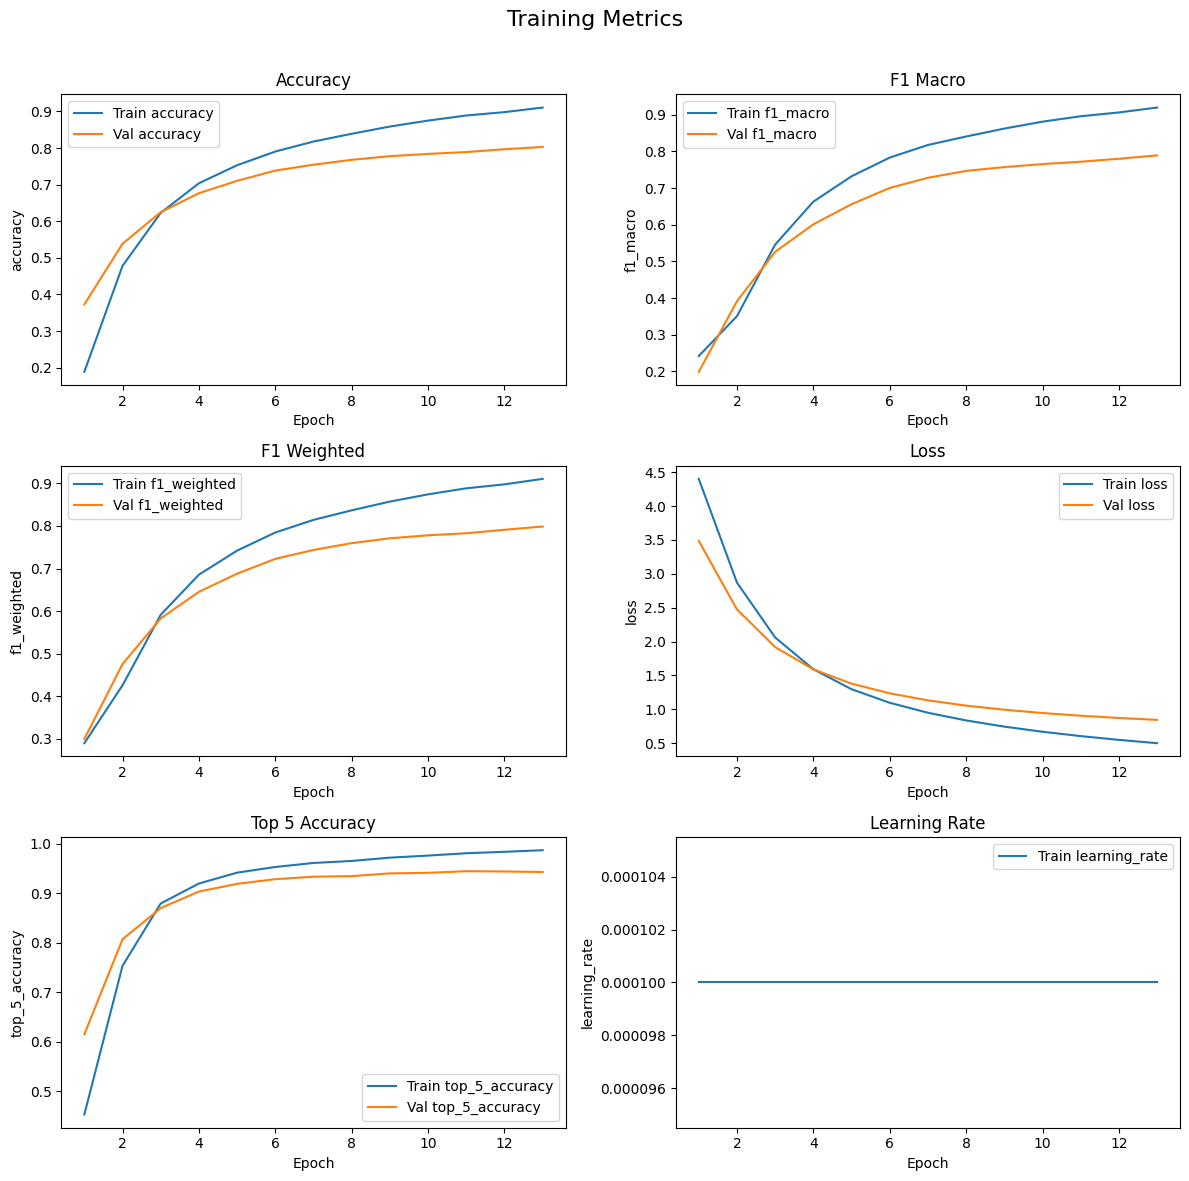

In [ ]:
plot_allmetrics(history_miniconvnext_batch16)

Evaluate on test

In [ ]:
y_true_test_miniconvnext_batch16 = []
y_pred_probs_test_miniconvnext_batch16 = []

for x_batch, y_batch in test_batch16:
    preds = model_miniconvnext_batch16.predict(x_batch, verbose=0)
    y_pred_probs_test_miniconvnext_batch16.append(preds)
    y_true_test_miniconvnext_batch16.append(y_batch.numpy())

y_true_test_miniconvnext_batch16 = np.concatenate(y_true_test_miniconvnext_batch16, axis=0)
y_pred_probs_test_miniconvnext_batch16 = np.concatenate(y_pred_probs_test_miniconvnext_batch16, axis=0)

In [ ]:
acc_test = compute_accuracy(y_true_test_miniconvnext_batch16, y_pred_probs_test_miniconvnext_batch16)
f1_macro_test = compute_f1_macro(y_true_test_miniconvnext_batch16, y_pred_probs_test_miniconvnext_batch16)
f1_weighted_test = compute_f1_weighted(y_true_test_miniconvnext_batch16, y_pred_probs_test_miniconvnext_batch16)
top5_acc_test = compute_top5_accuracy(y_true_test_miniconvnext_batch16, y_pred_probs_test_miniconvnext_batch16)

print(f"Test Accuracy: {acc_test:.4f}")
print(f"Test F1 Macro: {f1_macro_test:.4f}")
print(f"Test F1 Weighted: {f1_weighted_test:.4f}")
print(f"Test Top-5 Accuracy: {top5_acc_test:.4f}")

Test Accuracy: 0.7998
Test F1 Macro: 0.7845
Test F1 Weighted: 0.7943
Test Top-5 Accuracy: 0.9405


### ConvNextDropout

In [ ]:
model_convnextdropout_batch16, history_convnextdropout_batch16 = ConvNextDropout(n_classes, train_batch16, val_batch16, epochs=13, callbacks=callbacks_head)


Epoch 1/13
525/525 ━━━━━━━━━━━━━━━━━━━━ 62s 74ms/step - accuracy: 0.0467 - f1_macro: 0.3282 - f1_weighted: 0.3494 - loss: 5.1721 - top_5_accuracy: 0.4395 - val_accuracy: 0.3250 - val_f1_macro: 0.1644 - val_f1_weighted: 0.2579 - val_loss: 3.7638 - val_top_5_accuracy: 0.5598 - learning_rate: 1.0000e-04
Epoch 2/13
525/525 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.3288 - f1_macro: 0.1758 - f1_weighted: 0.2711 - loss: 3.5326 - top_5_accuracy: 0.5757 - val_accuracy: 0.4947 - val_f1_macro: 0.3323 - val_f1_weighted: 0.4274 - val_loss: 2.7486 - val_top_5_accuracy: 0.7546 - learning_rate: 1.0000e-04
Epoch 3/13
525/525 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.5081 - f1_macro: 0.3663 - f1_weighted: 0.4601 - loss: 2.5868 - top_5_accuracy: 0.7673 - val_accuracy: 0.5799 - val_f1_macro: 0.4641 - val_f1_weighted: 0.5321 - val_loss: 2.1564 - val_top_5_accuracy: 0.8420 - learning_rate: 1.0000e-04
Epoch 4/13
525/525 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.6081 - f1_macro: 0.4973 - 

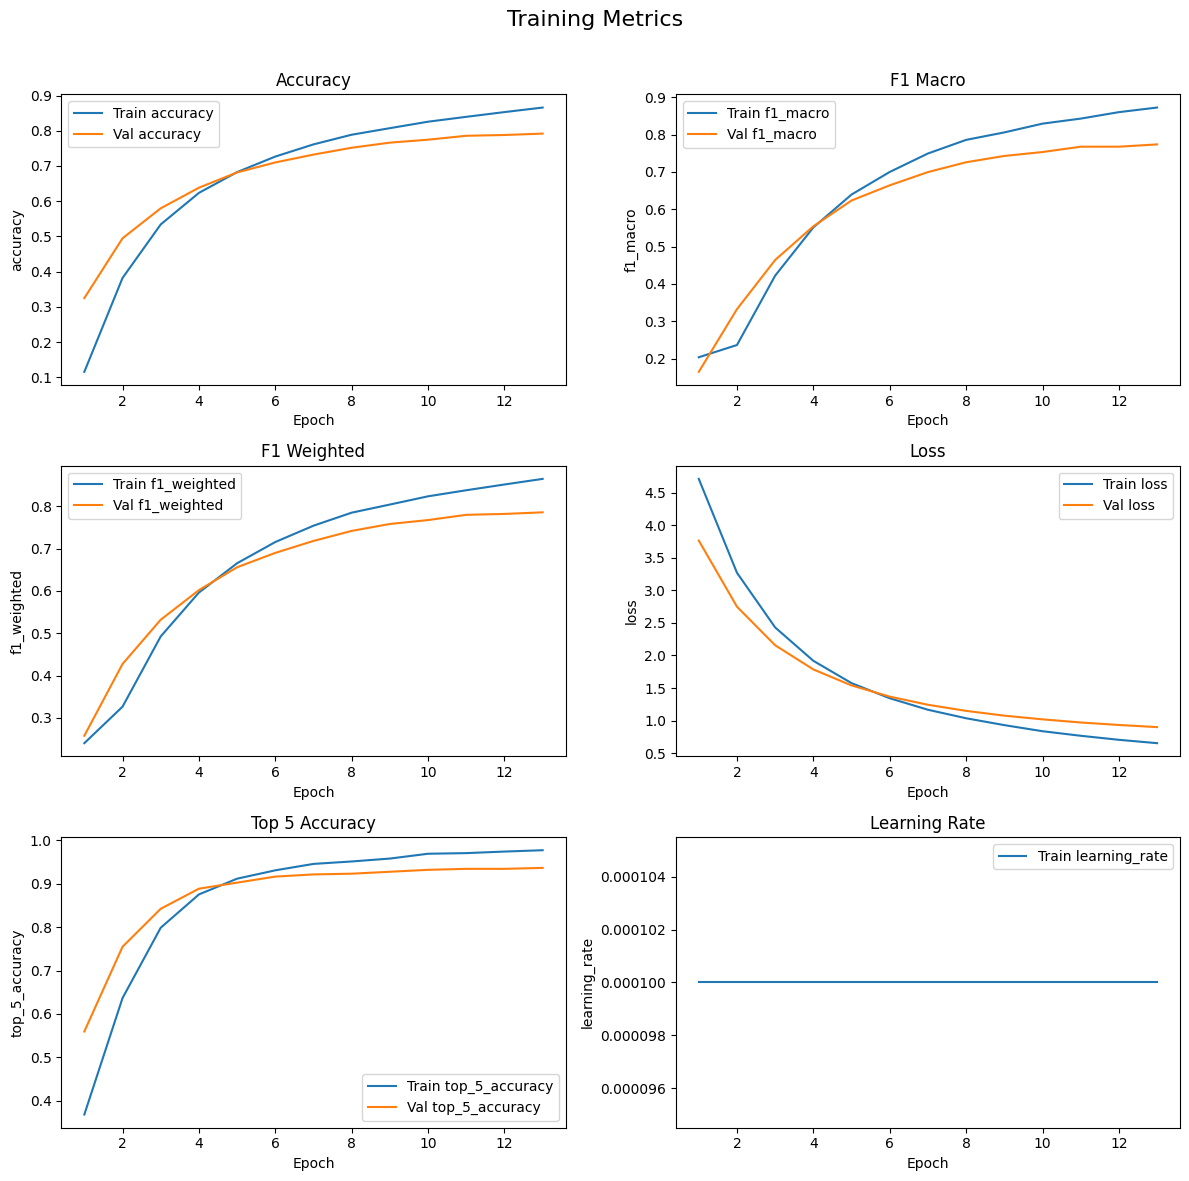

In [ ]:
plot_allmetrics(history_convnextdropout_batch16)

Evaluate on test

In [ ]:
y_true_test_convnextdropout_batch16 = []
y_pred_probs_test_convnextdropout_batch16 = []

for x_batch, y_batch in test_batch16:
    preds = model_convnextdropout_batch16.predict(x_batch, verbose=0)
    y_pred_probs_test_convnextdropout_batch16.append(preds)
    y_true_test_convnextdropout_batch16.append(y_batch.numpy())

y_true_test_convnextdropout_batch16 = np.concatenate(y_true_test_convnextdropout_batch16, axis=0)
y_pred_probs_test_convnextdropout_batch16 = np.concatenate(y_pred_probs_test_convnextdropout_batch16, axis=0)

In [ ]:
acc_test = compute_accuracy(y_true_test_convnextdropout_batch16, y_pred_probs_test_convnextdropout_batch16)
f1_macro_test = compute_f1_macro(y_true_test_convnextdropout_batch16, y_pred_probs_test_convnextdropout_batch16)
f1_weighted_test = compute_f1_weighted(y_true_test_convnextdropout_batch16, y_pred_probs_test_convnextdropout_batch16)
top5_acc_test = compute_top5_accuracy(y_true_test_convnextdropout_batch16, y_pred_probs_test_convnextdropout_batch16)

print(f"Test Accuracy: {acc_test:.4f}")
print(f"Test F1 Macro: {f1_macro_test:.4f}")
print(f"Test F1 Weighted: {f1_weighted_test:.4f}")
print(f"Test Top-5 Accuracy: {top5_acc_test:.4f}")

Test Accuracy: 0.7853
Test F1 Macro: 0.7661
Test F1 Weighted: 0.7791
Test Top-5 Accuracy: 0.9299


### ConvNextMid

In [ ]:
model_convnextmid_batch16, history_convnextmid_batch16 = ConvNextMid(n_classes, train_batch16, val_batch16, epochs=13, callbacks=callbacks_head)

Epoch 1/13
525/525 ━━━━━━━━━━━━━━━━━━━━ 67s 78ms/step - accuracy: 0.0676 - f1_macro: 0.2946 - f1_weighted: 0.3550 - loss: 5.3551 - top_5_accuracy: 0.4482 - val_accuracy: 0.4213 - val_f1_macro: 0.2524 - val_f1_weighted: 0.3770 - val_loss: 3.1937 - val_top_5_accuracy: 0.6077 - learning_rate: 1.0000e-04
Epoch 2/13
525/525 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.3743 - f1_macro: 0.2123 - f1_weighted: 0.3473 - loss: 3.1758 - top_5_accuracy: 0.5789 - val_accuracy: 0.5676 - val_f1_macro: 0.4206 - val_f1_weighted: 0.5207 - val_loss: 2.2301 - val_top_5_accuracy: 0.7807 - learning_rate: 1.0000e-04
Epoch 3/13
525/525 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.5390 - f1_macro: 0.3888 - f1_weighted: 0.5096 - loss: 2.2384 - top_5_accuracy: 0.7637 - val_accuracy: 0.6294 - val_f1_macro: 0.5098 - val_f1_weighted: 0.5897 - val_loss: 1.7558 - val_top_5_accuracy: 0.8509 - learning_rate: 1.0000e-04
Epoch 4/13
525/525 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.6407 - f1_macro: 0.5217 - 

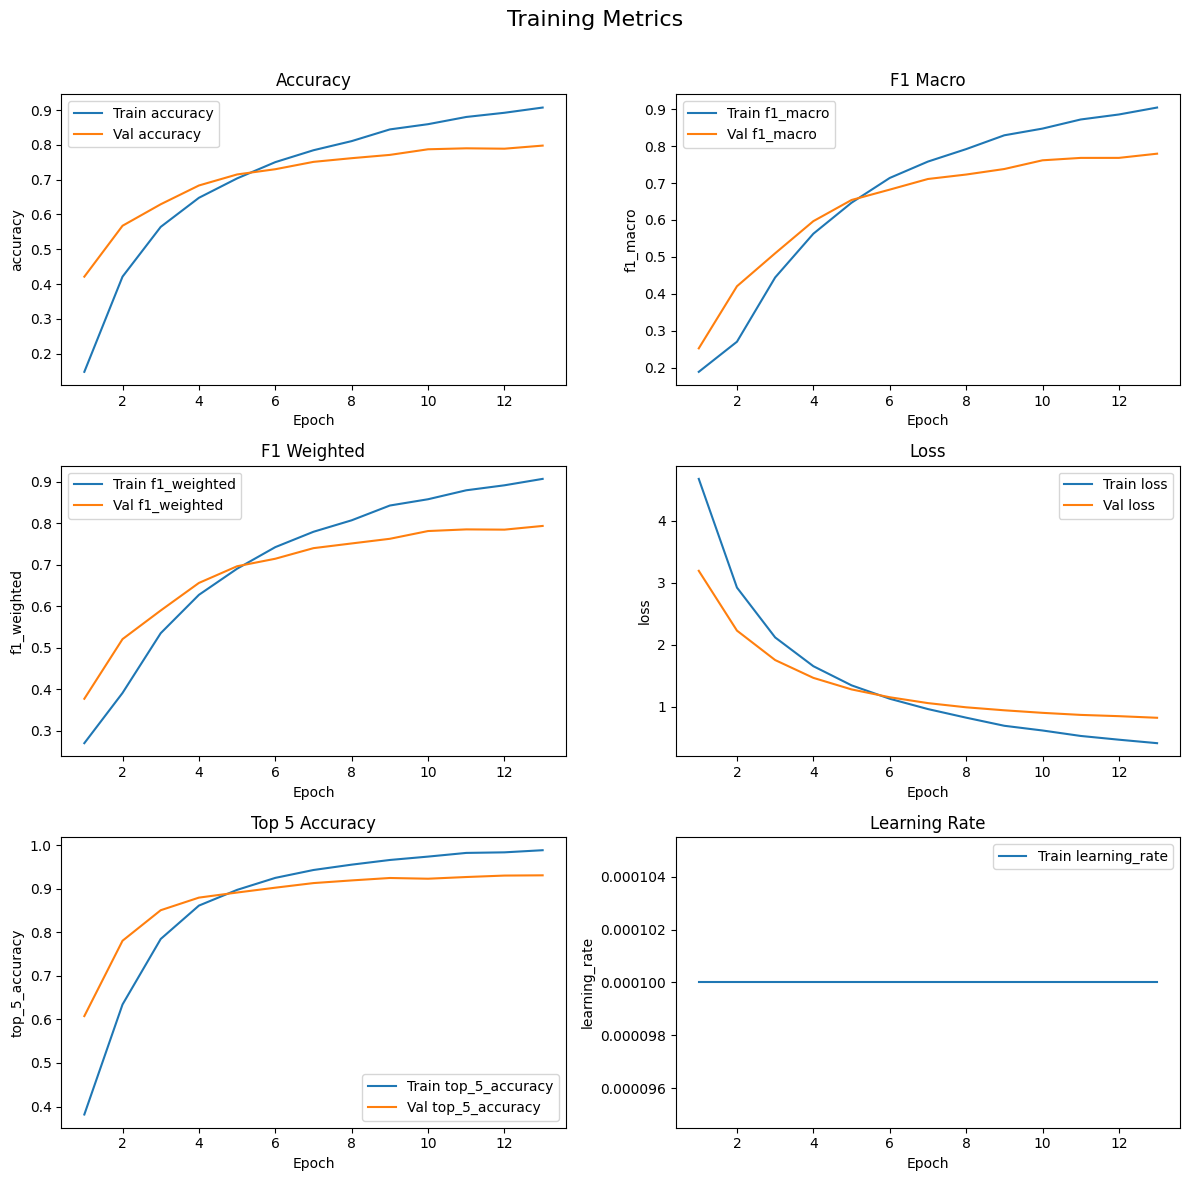

In [ ]:
plot_allmetrics(history_convnextmid_batch16)

Evaluate on test

In [ ]:
y_true_test_convnextmid_batch16 = []
y_pred_probs_test_convnextmid_batch16 = []

for x_batch, y_batch in test_batch16:
    preds = model_convnextmid_batch16.predict(x_batch, verbose=0)
    y_pred_probs_test_convnextmid_batch16.append(preds)
    y_true_test_convnextmid_batch16.append(y_batch.numpy())

y_true_test_convnextmid_batch16 = np.concatenate(y_true_test_convnextmid_batch16, axis=0)
y_pred_probs_test_convnextmid_batch16 = np.concatenate(y_pred_probs_test_convnextmid_batch16, axis=0)

In [ ]:
acc_test = compute_accuracy(y_true_test_convnextmid_batch16, y_pred_probs_test_convnextmid_batch16)
f1_macro_test = compute_f1_macro(y_true_test_convnextmid_batch16, y_pred_probs_test_convnextmid_batch16)
f1_weighted_test = compute_f1_weighted(y_true_test_convnextmid_batch16, y_pred_probs_test_convnextmid_batch16)
top5_acc_test = compute_top5_accuracy(y_true_test_convnextmid_batch16, y_pred_probs_test_convnextmid_batch16)

print(f"Test Accuracy: {acc_test:.4f}")
print(f"Test F1 Macro: {f1_macro_test:.4f}")
print(f"Test F1 Weighted: {f1_weighted_test:.4f}")
print(f"Test Top-5 Accuracy: {top5_acc_test:.4f}")

Test Accuracy: 0.7998
Test F1 Macro: 0.7776
Test F1 Weighted: 0.7949
Test Top-5 Accuracy: 0.9372


### ConvNextFull

In [ ]:
model_convnextfull_batch16, history_convnextfull_batch16 = ConvNextFull(n_classes, train_batch16, val_batch16, epochs=13, callbacks=callbacks_head)

Epoch 1/13
525/525 ━━━━━━━━━━━━━━━━━━━━ 71s 80ms/step - accuracy: 0.0847 - f1_macro: 0.3007 - f1_weighted: 0.3671 - loss: 8.8820 - top_5_accuracy: 0.4658 - val_accuracy: 0.5314 - val_f1_macro: 0.3660 - val_f1_weighted: 0.4673 - val_loss: 5.7751 - val_top_5_accuracy: 0.7501 - learning_rate: 1.0000e-04
Epoch 2/13
525/525 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.4109 - f1_macro: 0.2553 - f1_weighted: 0.3873 - loss: 6.1673 - top_5_accuracy: 0.6193 - val_accuracy: 0.6416 - val_f1_macro: 0.5304 - val_f1_weighted: 0.6027 - val_loss: 4.9145 - val_top_5_accuracy: 0.8620 - learning_rate: 1.0000e-04
Epoch 3/13
525/525 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.5438 - f1_macro: 0.4140 - f1_weighted: 0.5230 - loss: 5.3009 - top_5_accuracy: 0.7779 - val_accuracy: 0.6984 - val_f1_macro: 0.6122 - val_f1_weighted: 0.6676 - val_loss: 4.4661 - val_top_5_accuracy: 0.8987 - learning_rate: 1.0000e-04
Epoch 4/13
525/525 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.6263 - f1_macro: 0.5229 - 

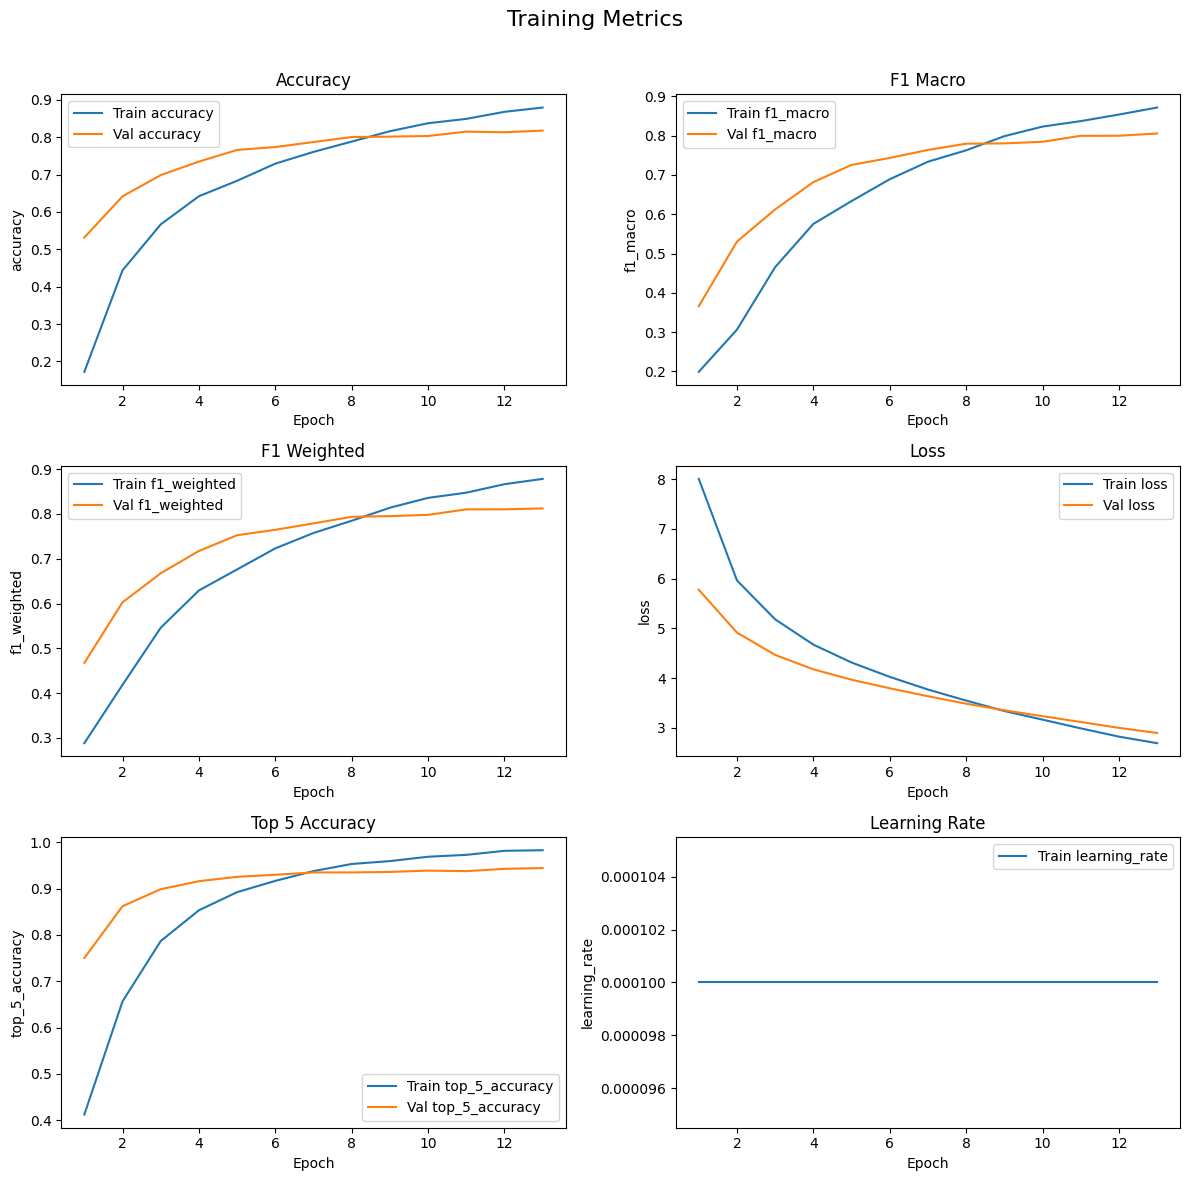

In [ ]:
plot_allmetrics(history_convnextfull_batch16)

Evaluate on test

In [ ]:
y_true_test_convnextfull_batch16 = []
y_pred_probs_test_convnextfull_batch16 = []

for x_batch, y_batch in test_batch16:
    preds = model_convnextfull_batch16.predict(x_batch, verbose=0)
    y_pred_probs_test_convnextfull_batch16.append(preds)
    y_true_test_convnextfull_batch16.append(y_batch.numpy())

y_true_test_convnextfull_batch16 = np.concatenate(y_true_test_convnextfull_batch16, axis=0)
y_pred_probs_test_convnextfull_batch16 = np.concatenate(y_pred_probs_test_convnextfull_batch16, axis=0)

In [ ]:
acc_test = compute_accuracy(y_true_test_convnextfull_batch16, y_pred_probs_test_convnextfull_batch16)
f1_macro_test = compute_f1_macro(y_true_test_convnextfull_batch16, y_pred_probs_test_convnextfull_batch16)
f1_weighted_test = compute_f1_weighted(y_true_test_convnextfull_batch16, y_pred_probs_test_convnextfull_batch16)
top5_acc_test = compute_top5_accuracy(y_true_test_convnextfull_batch16, y_pred_probs_test_convnextfull_batch16)

print(f"Test Accuracy: {acc_test:.4f}")
print(f"Test F1 Macro: {f1_macro_test:.4f}")
print(f"Test F1 Weighted: {f1_weighted_test:.4f}")
print(f"Test Top-5 Accuracy: {top5_acc_test:.4f}")

Test Accuracy: 0.8131
Test F1 Macro: 0.7924
Test F1 Weighted: 0.8072
Test Top-5 Accuracy: 0.9410


## Batch = 32

### MiniConvNext

In [ ]:
model_miniconvnext_batch32, history_miniconvnext_batch32 = MiniConvNext(n_classes, train_batch32, val_batch32, epochs=13, callbacks=callbacks_head)


Epoch 1/13
263/263 ━━━━━━━━━━━━━━━━━━━━ 72s 150ms/step - accuracy: 0.0526 - f1_macro: 0.3451 - f1_weighted: 0.3683 - loss: 5.0893 - top_5_accuracy: 0.4463 - val_accuracy: 0.3061 - val_f1_macro: 0.1485 - val_f1_weighted: 0.2409 - val_loss: 3.9703 - val_top_5_accuracy: 0.5136 - learning_rate: 1.0000e-04
Epoch 2/13
263/263 ━━━━━━━━━━━━━━━━━━━━ 23s 86ms/step - accuracy: 0.3619 - f1_macro: 0.2022 - f1_weighted: 0.3004 - loss: 3.6534 - top_5_accuracy: 0.6057 - val_accuracy: 0.4719 - val_f1_macro: 0.3089 - val_f1_weighted: 0.3993 - val_loss: 3.0025 - val_top_5_accuracy: 0.7273 - learning_rate: 1.0000e-04
Epoch 3/13
263/263 ━━━━━━━━━━━━━━━━━━━━ 23s 87ms/step - accuracy: 0.5124 - f1_macro: 0.3533 - f1_weighted: 0.4540 - loss: 2.7433 - top_5_accuracy: 0.7822 - val_accuracy: 0.5593 - val_f1_macro: 0.4242 - val_f1_weighted: 0.5025 - val_loss: 2.4039 - val_top_5_accuracy: 0.8186 - learning_rate: 1.0000e-04
Epoch 4/13
263/263 ━━━━━━━━━━━━━━━━━━━━ 23s 87ms/step - accuracy: 0.6046 - f1_macro: 0.4753 -

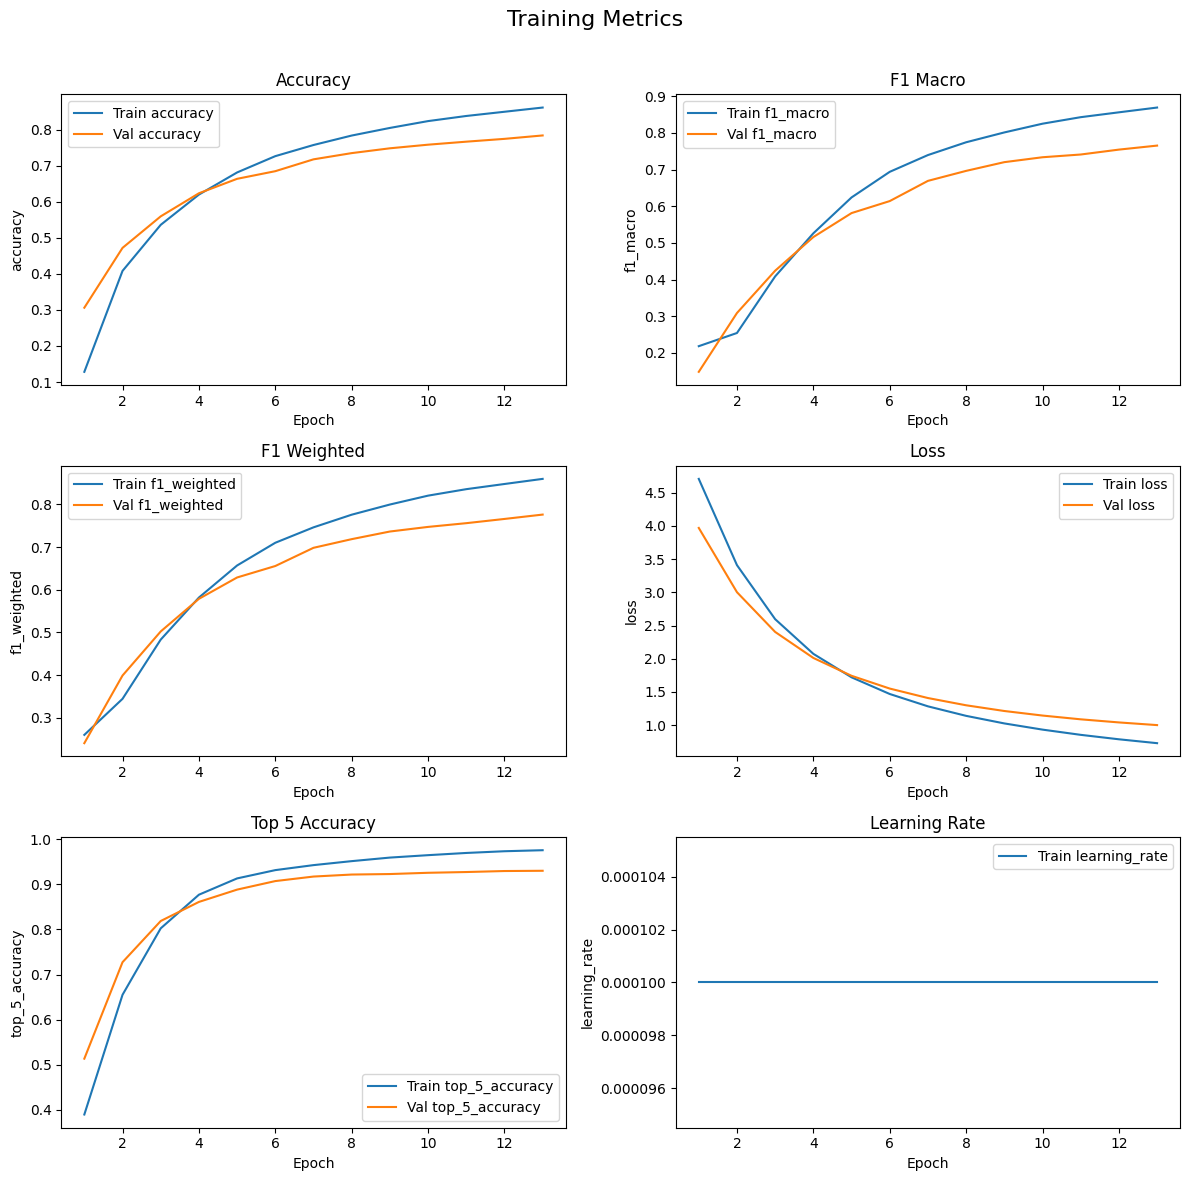

In [ ]:
plot_allmetrics(history_miniconvnext_batch32)

Evaluate on test

In [ ]:
y_true_test_miniconvnext_batch32 = []
y_pred_probs_test_miniconvnext_batch32 = []

for x_batch, y_batch in test_batch32:
    preds = model_miniconvnext_batch32.predict(x_batch, verbose=0)
    y_pred_probs_test_miniconvnext_batch32.append(preds)
    y_true_test_miniconvnext_batch32.append(y_batch.numpy())

y_true_test_miniconvnext_batch32 = np.concatenate(y_true_test_miniconvnext_batch32, axis=0)
y_pred_probs_test_miniconvnext_batch32 = np.concatenate(y_pred_probs_test_miniconvnext_batch32, axis=0)

In [ ]:
acc_test = compute_accuracy(y_true_test_miniconvnext_batch32, y_pred_probs_test_miniconvnext_batch32)
f1_macro_test = compute_f1_macro(y_true_test_miniconvnext_batch32, y_pred_probs_test_miniconvnext_batch32)
f1_weighted_test = compute_f1_weighted(y_true_test_miniconvnext_batch32, y_pred_probs_test_miniconvnext_batch32)
top5_acc_test = compute_top5_accuracy(y_true_test_miniconvnext_batch32, y_pred_probs_test_miniconvnext_batch32)

print(f"Test Accuracy: {acc_test:.4f}")
print(f"Test F1 Macro: {f1_macro_test:.4f}")
print(f"Test F1 Weighted: {f1_weighted_test:.4f}")
print(f"Test Top-5 Accuracy: {top5_acc_test:.4f}")

Test Accuracy: 0.7747
Test F1 Macro: 0.7471
Test F1 Weighted: 0.7651
Test Top-5 Accuracy: 0.9299


### ConvNextDropout

In [ ]:
model_convnextdropout_batch32, history_convnextdropout_batch32 = ConvNextDropout(n_classes, train_batch32, val_batch32, epochs=13, callbacks=callbacks_head)


Epoch 1/13
263/263 ━━━━━━━━━━━━━━━━━━━━ 66s 153ms/step - accuracy: 0.0253 - f1_macro: 0.3024 - f1_weighted: 0.3271 - loss: 5.2923 - top_5_accuracy: 0.4021 - val_accuracy: 0.2437 - val_f1_macro: 0.1071 - val_f1_weighted: 0.1827 - val_loss: 4.2112 - val_top_5_accuracy: 0.4368 - learning_rate: 1.0000e-04
Epoch 2/13
263/263 ━━━━━━━━━━━━━━━━━━━━ 23s 87ms/step - accuracy: 0.2546 - f1_macro: 0.1217 - f1_weighted: 0.2062 - loss: 4.0030 - top_5_accuracy: 0.4554 - val_accuracy: 0.4240 - val_f1_macro: 0.2557 - val_f1_weighted: 0.3518 - val_loss: 3.2796 - val_top_5_accuracy: 0.6678 - learning_rate: 1.0000e-04
Epoch 3/13
263/263 ━━━━━━━━━━━━━━━━━━━━ 23s 87ms/step - accuracy: 0.4214 - f1_macro: 0.2690 - f1_weighted: 0.3649 - loss: 3.1205 - top_5_accuracy: 0.6730 - val_accuracy: 0.5242 - val_f1_macro: 0.3816 - val_f1_weighted: 0.4613 - val_loss: 2.6661 - val_top_5_accuracy: 0.7913 - learning_rate: 1.0000e-04
Epoch 4/13
263/263 ━━━━━━━━━━━━━━━━━━━━ 23s 86ms/step - accuracy: 0.5331 - f1_macro: 0.3990 -

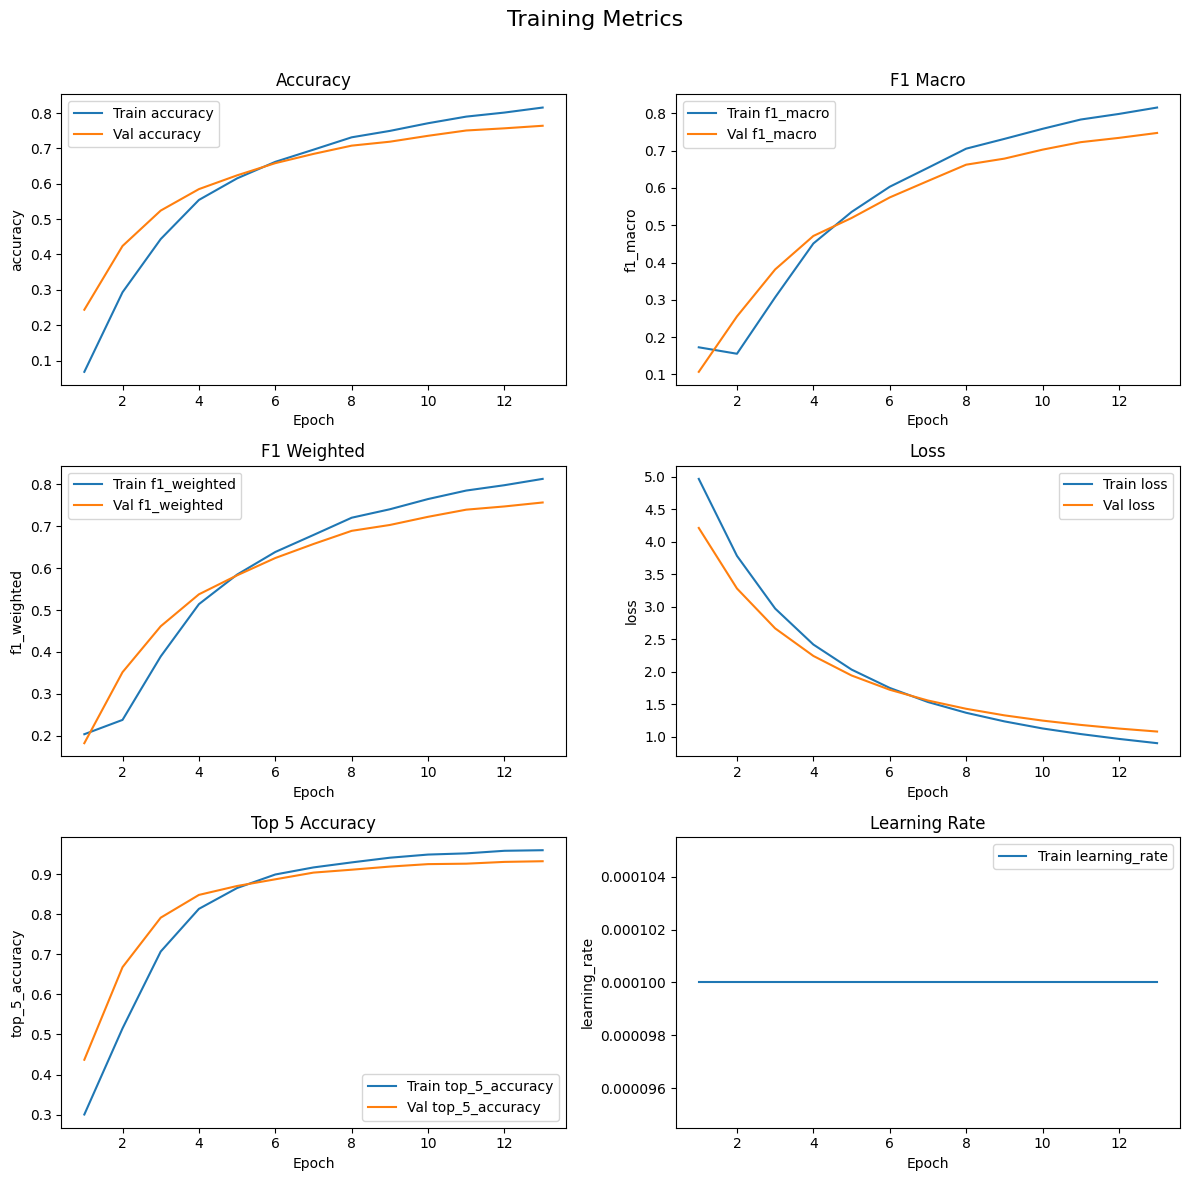

In [ ]:
plot_allmetrics(history_convnextdropout_batch32)

Evaluate on test

In [ ]:
y_true_test_convnextdropout_batch32 = []
y_pred_probs_test_convnextdropout_batch32 = []

for x_batch, y_batch in test_batch32:
    preds = model_convnextdropout_batch32.predict(x_batch, verbose=0)
    y_pred_probs_test_convnextdropout_batch32.append(preds)
    y_true_test_convnextdropout_batch32.append(y_batch.numpy())

y_true_test_convnextdropout_batch32 = np.concatenate(y_true_test_convnextdropout_batch32, axis=0)
y_pred_probs_test_convnextdropout_batch32 = np.concatenate(y_pred_probs_test_convnextdropout_batch32, axis=0)

In [ ]:
acc_test = compute_accuracy(y_true_test_convnextdropout_batch32, y_pred_probs_test_convnextdropout_batch32)
f1_macro_test = compute_f1_macro(y_true_test_convnextdropout_batch32, y_pred_probs_test_convnextdropout_batch32)
f1_weighted_test = compute_f1_weighted(y_true_test_convnextdropout_batch32, y_pred_probs_test_convnextdropout_batch32)
top5_acc_test = compute_top5_accuracy(y_true_test_convnextdropout_batch32, y_pred_probs_test_convnextdropout_batch32)

print(f"Test Accuracy: {acc_test:.4f}")
print(f"Test F1 Macro: {f1_macro_test:.4f}")
print(f"Test F1 Weighted: {f1_weighted_test:.4f}")
print(f"Test Top-5 Accuracy: {top5_acc_test:.4f}")

Test Accuracy: 0.7608
Test F1 Macro: 0.7274
Test F1 Weighted: 0.7483
Test Top-5 Accuracy: 0.9271


### ConvNextMid

In [ ]:
model_convnextmid_batch32, history_convnextmid_batch32 = ConvNextMid(n_classes, train_batch32, val_batch32, epochs=13, callbacks=callbacks_head)

Epoch 1/13
263/263 ━━━━━━━━━━━━━━━━━━━━ 69s 156ms/step - accuracy: 0.0463 - f1_macro: 0.2753 - f1_weighted: 0.3264 - loss: 5.5471 - top_5_accuracy: 0.4205 - val_accuracy: 0.3367 - val_f1_macro: 0.1648 - val_f1_weighted: 0.2940 - val_loss: 3.7439 - val_top_5_accuracy: 0.5097 - learning_rate: 1.0000e-04
Epoch 2/13
263/263 ━━━━━━━━━━━━━━━━━━━━ 23s 87ms/step - accuracy: 0.3334 - f1_macro: 0.1720 - f1_weighted: 0.3129 - loss: 3.5169 - top_5_accuracy: 0.5071 - val_accuracy: 0.5131 - val_f1_macro: 0.3531 - val_f1_weighted: 0.4579 - val_loss: 2.6120 - val_top_5_accuracy: 0.7173 - learning_rate: 1.0000e-04
Epoch 3/13
263/263 ━━━━━━━━━━━━━━━━━━━━ 23s 87ms/step - accuracy: 0.4771 - f1_macro: 0.3139 - f1_weighted: 0.4446 - loss: 2.6088 - top_5_accuracy: 0.6975 - val_accuracy: 0.5860 - val_f1_macro: 0.4513 - val_f1_weighted: 0.5392 - val_loss: 2.0653 - val_top_5_accuracy: 0.8130 - learning_rate: 1.0000e-04
Epoch 4/13
263/263 ━━━━━━━━━━━━━━━━━━━━ 23s 87ms/step - accuracy: 0.5783 - f1_macro: 0.4306 -

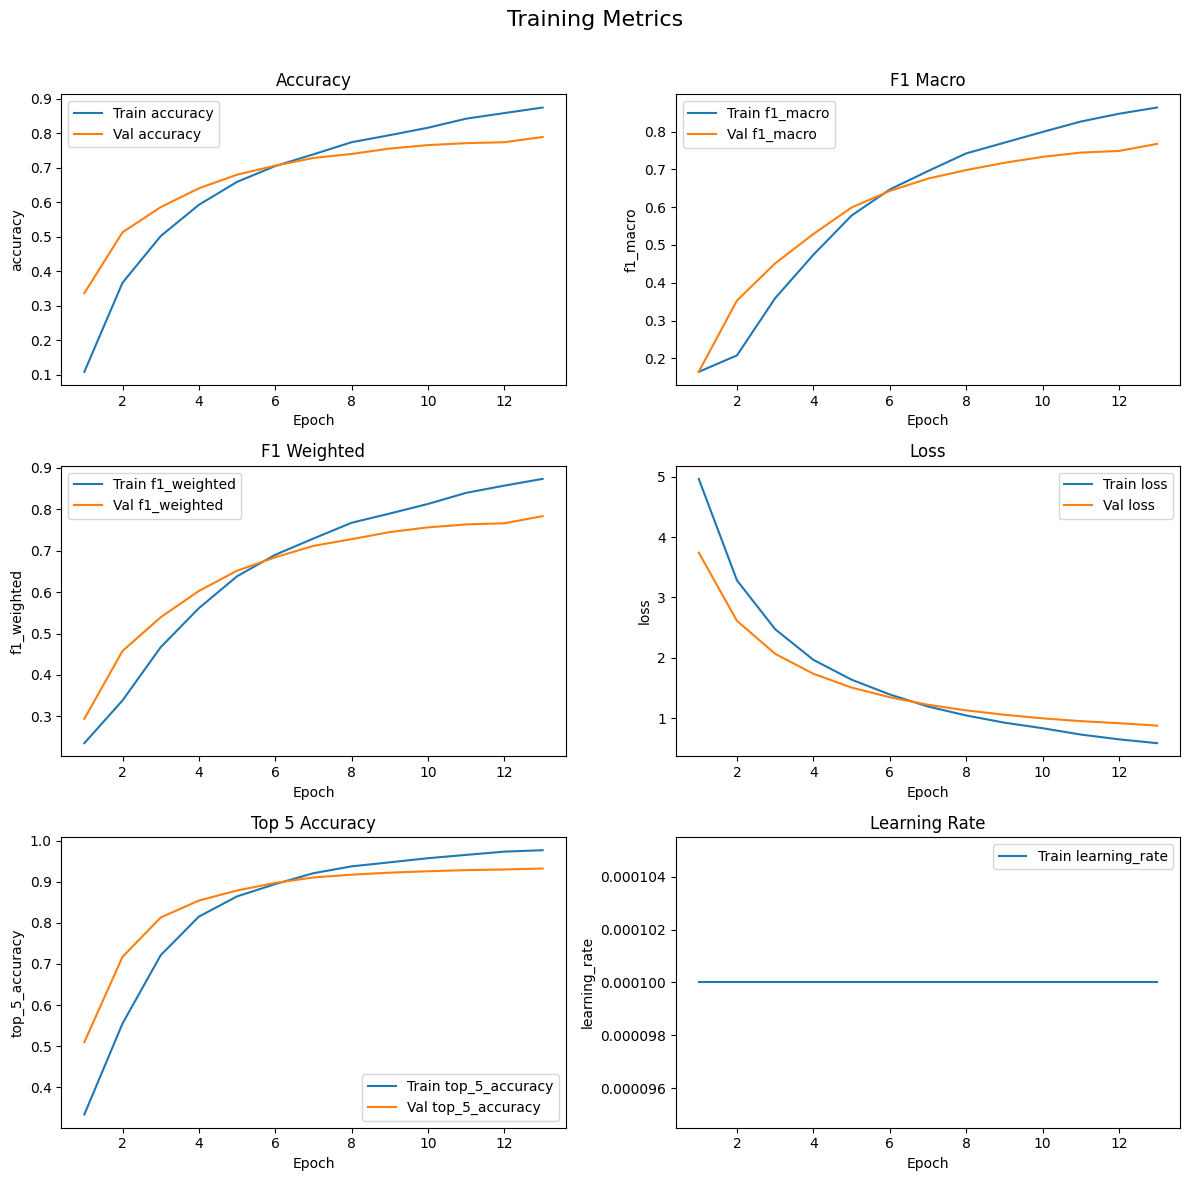

In [ ]:
plot_allmetrics(history_convnextmid_batch32)

Evaluate on test

In [ ]:
y_true_test_convnextmid_batch32 = []
y_pred_probs_test_convnextmid_batch32 = []

for x_batch, y_batch in test_batch32:
    preds = model_convnextmid_batch32.predict(x_batch, verbose=0)
    y_pred_probs_test_convnextmid_batch32.append(preds)
    y_true_test_convnextmid_batch32.append(y_batch.numpy())

y_true_test_convnextmid_batch32 = np.concatenate(y_true_test_convnextmid_batch32, axis=0)
y_pred_probs_test_convnextmid_batch32 = np.concatenate(y_pred_probs_test_convnextmid_batch32, axis=0)

In [ ]:
acc_test = compute_accuracy(y_true_test_convnextmid_batch32, y_pred_probs_test_convnextmid_batch32)
f1_macro_test = compute_f1_macro(y_true_test_convnextmid_batch32, y_pred_probs_test_convnextmid_batch32)
f1_weighted_test = compute_f1_weighted(y_true_test_convnextmid_batch32, y_pred_probs_test_convnextmid_batch32)
top5_acc_test = compute_top5_accuracy(y_true_test_convnextmid_batch32, y_pred_probs_test_convnextmid_batch32)

print(f"Test Accuracy: {acc_test:.4f}")
print(f"Test F1 Macro: {f1_macro_test:.4f}")
print(f"Test F1 Weighted: {f1_weighted_test:.4f}")
print(f"Test Top-5 Accuracy: {top5_acc_test:.4f}")

Test Accuracy: 0.7781
Test F1 Macro: 0.7438
Test F1 Weighted: 0.7703
Test Top-5 Accuracy: 0.9283


### ConvNextFull

In [14]:
model_convnextfull_batch32, history_convnextfull_batch32 = ConvNextFull(n_classes, train_batch32, val_batch32, epochs=13, callbacks=callbacks_head)

350926856/350926856 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step
Epoch 1/13
263/263 ━━━━━━━━━━━━━━━━━━━━ 148s 450ms/step - accuracy: 0.0654 - f1_macro: 0.0323 - f1_weighted: 0.0752 - loss: 9.1044 - top_5_accuracy: 0.1331 - val_accuracy: 0.4446 - val_f1_macro: 0.2730 - val_f1_weighted: 0.3866 - val_loss: 6.4808 - val_top_5_accuracy: 0.6628 - learning_rate: 1.0000e-04
Epoch 2/13
263/263 ━━━━━━━━━━━━━━━━━━━━ 105s 400ms/step - accuracy: 0.3495 - f1_macro: 0.1974 - f1_weighted: 0.3296 - loss: 6.6078 - top_5_accuracy: 0.5429 - val_accuracy: 0.5938 - val_f1_macro: 0.4660 - val_f1_weighted: 0.5436 - val_loss: 5.2417 - val_top_5_accuracy: 0.8370 - learning_rate: 1.0000e-04
Epoch 3/13
263/263 ━━━━━━━━━━━━━━━━━━━━ 106s 402ms/step - accuracy: 0.5133 - f1_macro: 0.3738 - f1_weighted: 0.4896 - loss: 5.5866 - top_5_accuracy: 0.7229 - val_accuracy: 0.6516 - val_f1_macro: 0.5648 - val_f1_weighted: 0.6197 - val_loss: 4.7604 - val_top_5_accuracy: 0.8865 - learning_rate: 1.0000e-04
Epoch 4/13
263/263 ━━━━━━━━━━━━━━━

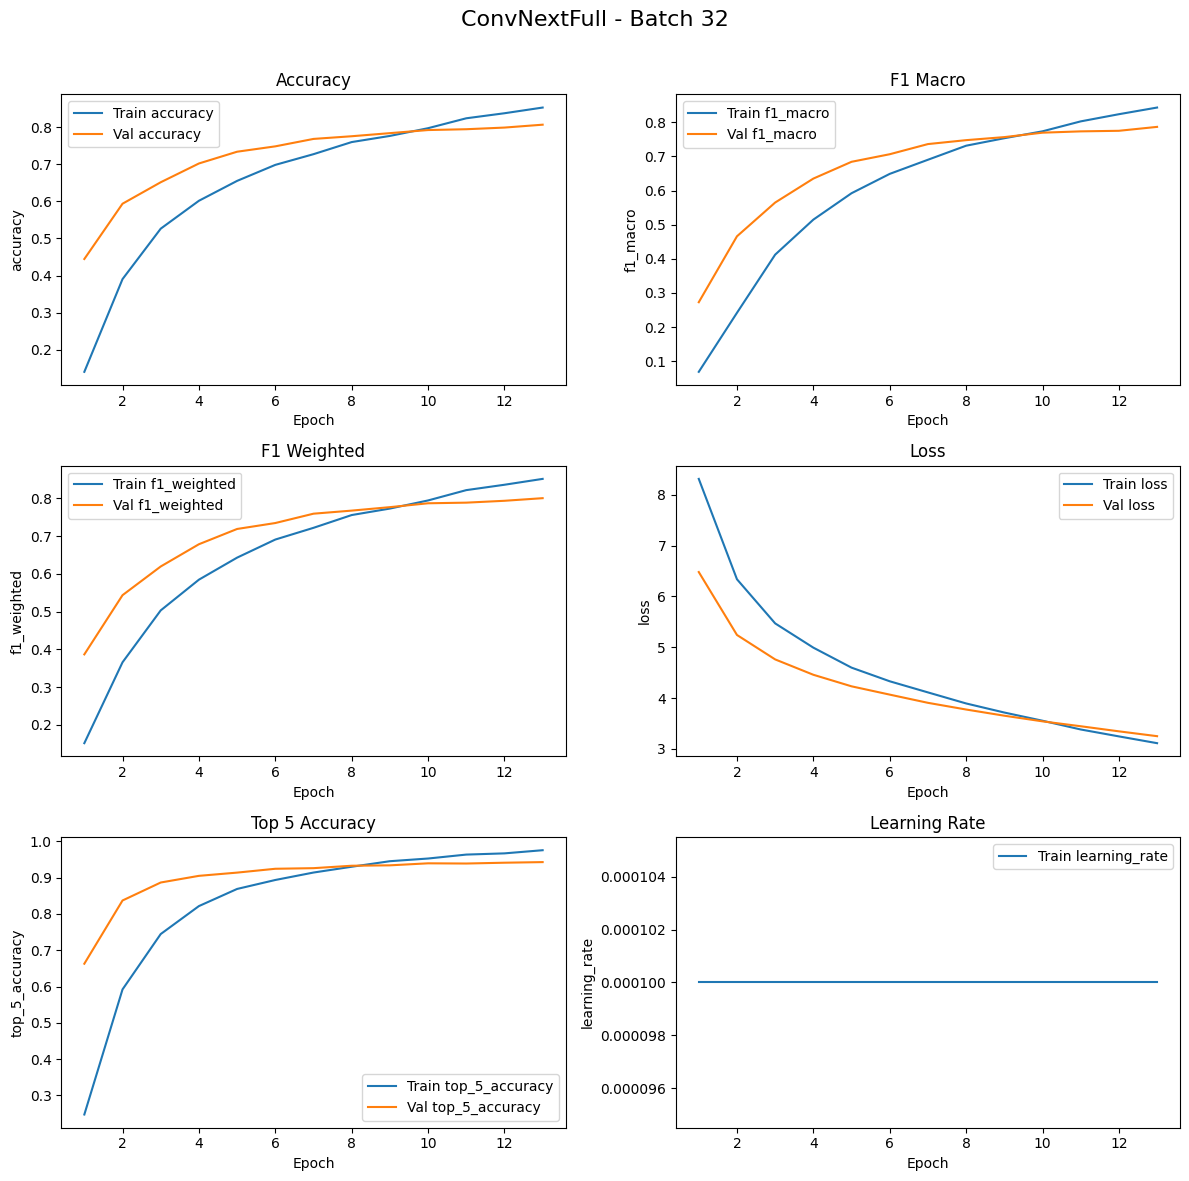

In [15]:
plot_all_metrics(history_convnextfull_batch32, "ConvNextFull - Batch 32")

Evaluate on test

In [16]:
y_true_test_convnextfull_batch32 = []
y_pred_probs_test_convnextfull_batch32 = []

for x_batch, y_batch in test_batch32:
    preds = model_convnextfull_batch32.predict(x_batch, verbose=0)
    y_pred_probs_test_convnextfull_batch32.append(preds)
    y_true_test_convnextfull_batch32.append(y_batch.numpy())

y_true_test_convnextfull_batch32 = np.concatenate(y_true_test_convnextfull_batch32, axis=0)
y_pred_probs_test_convnextfull_batch32 = np.concatenate(y_pred_probs_test_convnextfull_batch32, axis=0)

In [17]:
acc_test = compute_accuracy(y_true_test_convnextfull_batch32, y_pred_probs_test_convnextfull_batch32)
f1_macro_test = compute_f1_macro(y_true_test_convnextfull_batch32, y_pred_probs_test_convnextfull_batch32)
f1_weighted_test = compute_f1_weighted(y_true_test_convnextfull_batch32, y_pred_probs_test_convnextfull_batch32)
top5_acc_test = compute_top5_accuracy(y_true_test_convnextfull_batch32, y_pred_probs_test_convnextfull_batch32)

print(f"Test Accuracy: {acc_test:.4f}")
print(f"Test F1 Macro: {f1_macro_test:.4f}")
print(f"Test F1 Weighted: {f1_weighted_test:.4f}")
print(f"Test Top-5 Accuracy: {top5_acc_test:.4f}")

Test Accuracy: 0.8092
Test F1 Macro: 0.7855
Test F1 Weighted: 0.8024
Test Top-5 Accuracy: 0.9394


## Batch = 64

### MiniConvNext

In [ ]:
model_miniconvnext_batch64, history_miniconvnext_batch64 = MiniConvNext(n_classes, train_batch64, val_batch64, epochs=13, callbacks=callbacks_head)


Epoch 1/13
132/132 ━━━━━━━━━━━━━━━━━━━━ 73s 294ms/step - accuracy: 0.0288 - f1_macro: 0.3266 - f1_weighted: 0.3457 - loss: 5.2507 - top_5_accuracy: 0.4056 - val_accuracy: 0.1525 - val_f1_macro: 0.0612 - val_f1_weighted: 0.1157 - val_loss: 4.4637 - val_top_5_accuracy: 0.3511 - learning_rate: 1.0000e-04
Epoch 2/13
132/132 ━━━━━━━━━━━━━━━━━━━━ 23s 172ms/step - accuracy: 0.2301 - f1_macro: 0.1053 - f1_weighted: 0.1845 - loss: 4.1938 - top_5_accuracy: 0.4417 - val_accuracy: 0.3701 - val_f1_macro: 0.2184 - val_f1_weighted: 0.3055 - val_loss: 3.6217 - val_top_5_accuracy: 0.6088 - learning_rate: 1.0000e-04
Epoch 3/13
132/132 ━━━━━━━━━━━━━━━━━━━━ 23s 171ms/step - accuracy: 0.4113 - f1_macro: 0.2515 - f1_weighted: 0.3469 - loss: 3.3763 - top_5_accuracy: 0.6777 - val_accuracy: 0.4730 - val_f1_macro: 0.3179 - val_f1_weighted: 0.4061 - val_loss: 3.0055 - val_top_5_accuracy: 0.7318 - learning_rate: 1.0000e-04
Epoch 4/13
132/132 ━━━━━━━━━━━━━━━━━━━━ 23s 172ms/step - accuracy: 0.5131 - f1_macro: 0.370

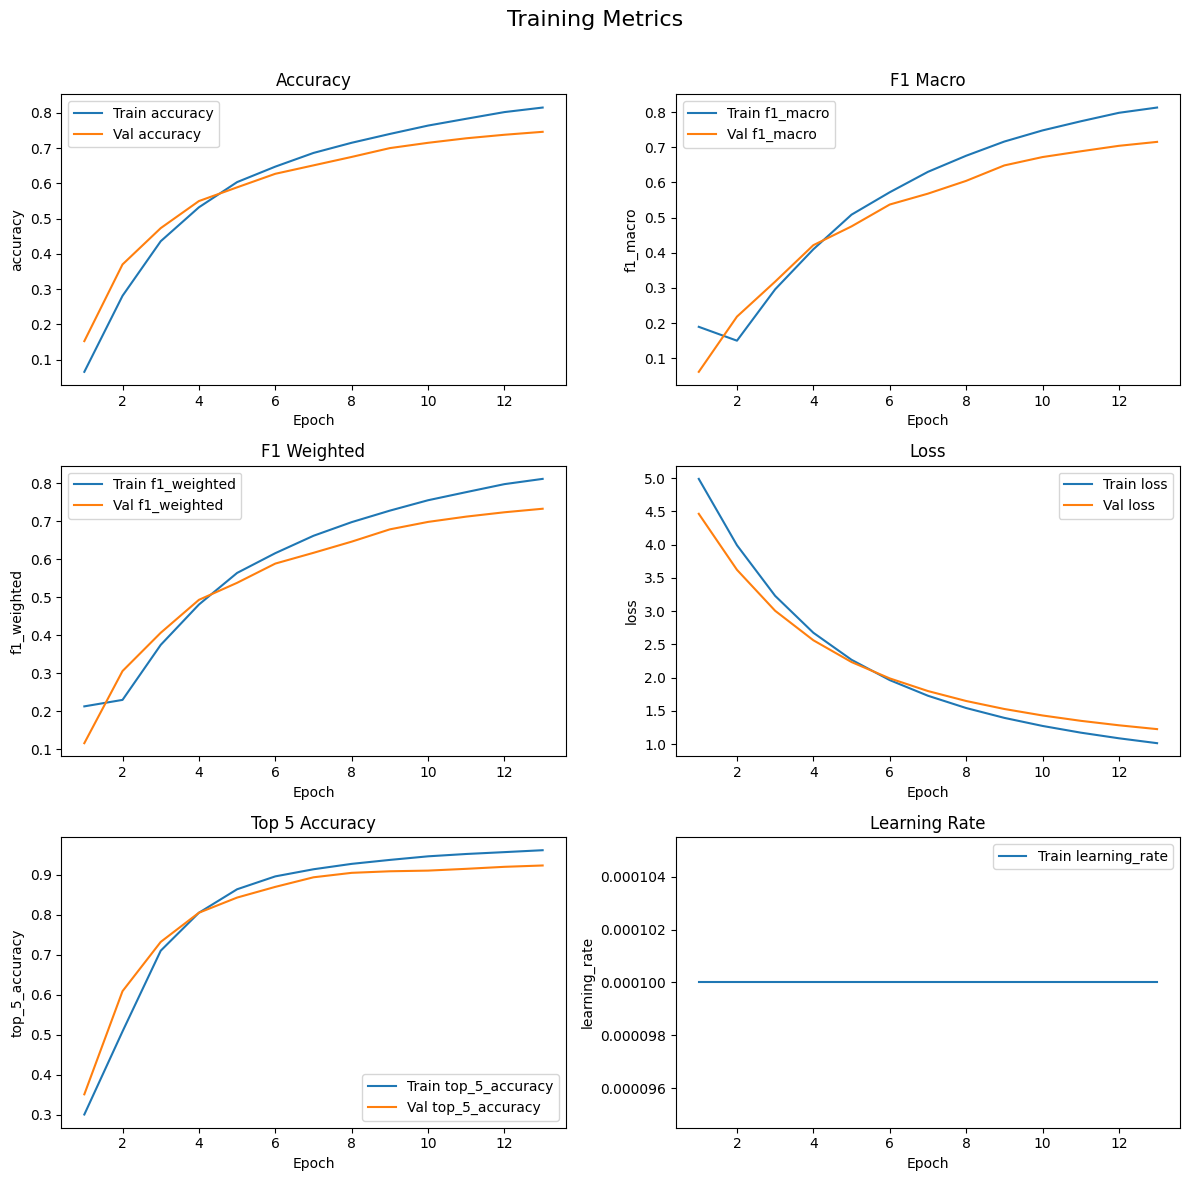

In [ ]:
plot_allmetrics(history_miniconvnext_batch64)

Evaluate on test

In [ ]:
y_true_test_miniconvnext_batch64 = []
y_pred_probs_test_miniconvnext_batch64 = []

for x_batch, y_batch in test_batch64:
    preds = model_miniconvnext_batch64.predict(x_batch, verbose=0)
    y_pred_probs_test_miniconvnext_batch64.append(preds)
    y_true_test_miniconvnext_batch64.append(y_batch.numpy())

y_true_test_miniconvnext_batch64 = np.concatenate(y_true_test_miniconvnext_batch64, axis=0)
y_pred_probs_test_miniconvnext_batch64 = np.concatenate(y_pred_probs_test_miniconvnext_batch64, axis=0)

In [ ]:
acc_test = compute_accuracy(y_true_test_miniconvnext_batch64, y_pred_probs_test_miniconvnext_batch64)
f1_macro_test = compute_f1_macro(y_true_test_miniconvnext_batch64, y_pred_probs_test_miniconvnext_batch64)
f1_weighted_test = compute_f1_weighted(y_true_test_miniconvnext_batch64, y_pred_probs_test_miniconvnext_batch64)
top5_acc_test = compute_top5_accuracy(y_true_test_miniconvnext_batch64, y_pred_probs_test_miniconvnext_batch64)

print(f"Test Accuracy: {acc_test:.4f}")
print(f"Test F1 Macro: {f1_macro_test:.4f}")
print(f"Test F1 Weighted: {f1_weighted_test:.4f}")
print(f"Test Top-5 Accuracy: {top5_acc_test:.4f}")

Test Accuracy: 0.7403
Test F1 Macro: 0.7114
Test F1 Weighted: 0.7287
Test Top-5 Accuracy: 0.9171


### ConvNextDropout

In [ ]:
model_convnextdropout_batch64, history_convnextdropout_batch64 = ConvNextDropout(n_classes, train_batch64, val_batch64, epochs=13, callbacks=callbacks_head)


Epoch 1/13
132/132 ━━━━━━━━━━━━━━━━━━━━ 64s 298ms/step - accuracy: 0.0239 - f1_macro: 0.2793 - f1_weighted: 0.3129 - loss: 5.3777 - top_5_accuracy: 0.3866 - val_accuracy: 0.1536 - val_f1_macro: 0.0530 - val_f1_weighted: 0.1092 - val_loss: 4.5885 - val_top_5_accuracy: 0.2877 - learning_rate: 1.0000e-04
Epoch 2/13
132/132 ━━━━━━━━━━━━━━━━━━━━ 23s 171ms/step - accuracy: 0.1693 - f1_macro: 0.0683 - f1_weighted: 0.1354 - loss: 4.4215 - top_5_accuracy: 0.3164 - val_accuracy: 0.3127 - val_f1_macro: 0.1629 - val_f1_weighted: 0.2460 - val_loss: 3.8198 - val_top_5_accuracy: 0.5442 - learning_rate: 1.0000e-04
Epoch 3/13
132/132 ━━━━━━━━━━━━━━━━━━━━ 23s 173ms/step - accuracy: 0.3181 - f1_macro: 0.1693 - f1_weighted: 0.2621 - loss: 3.6529 - top_5_accuracy: 0.5533 - val_accuracy: 0.4196 - val_f1_macro: 0.2629 - val_f1_weighted: 0.3508 - val_loss: 3.2379 - val_top_5_accuracy: 0.6906 - learning_rate: 1.0000e-04
Epoch 4/13
132/132 ━━━━━━━━━━━━━━━━━━━━ 23s 171ms/step - accuracy: 0.4328 - f1_macro: 0.286

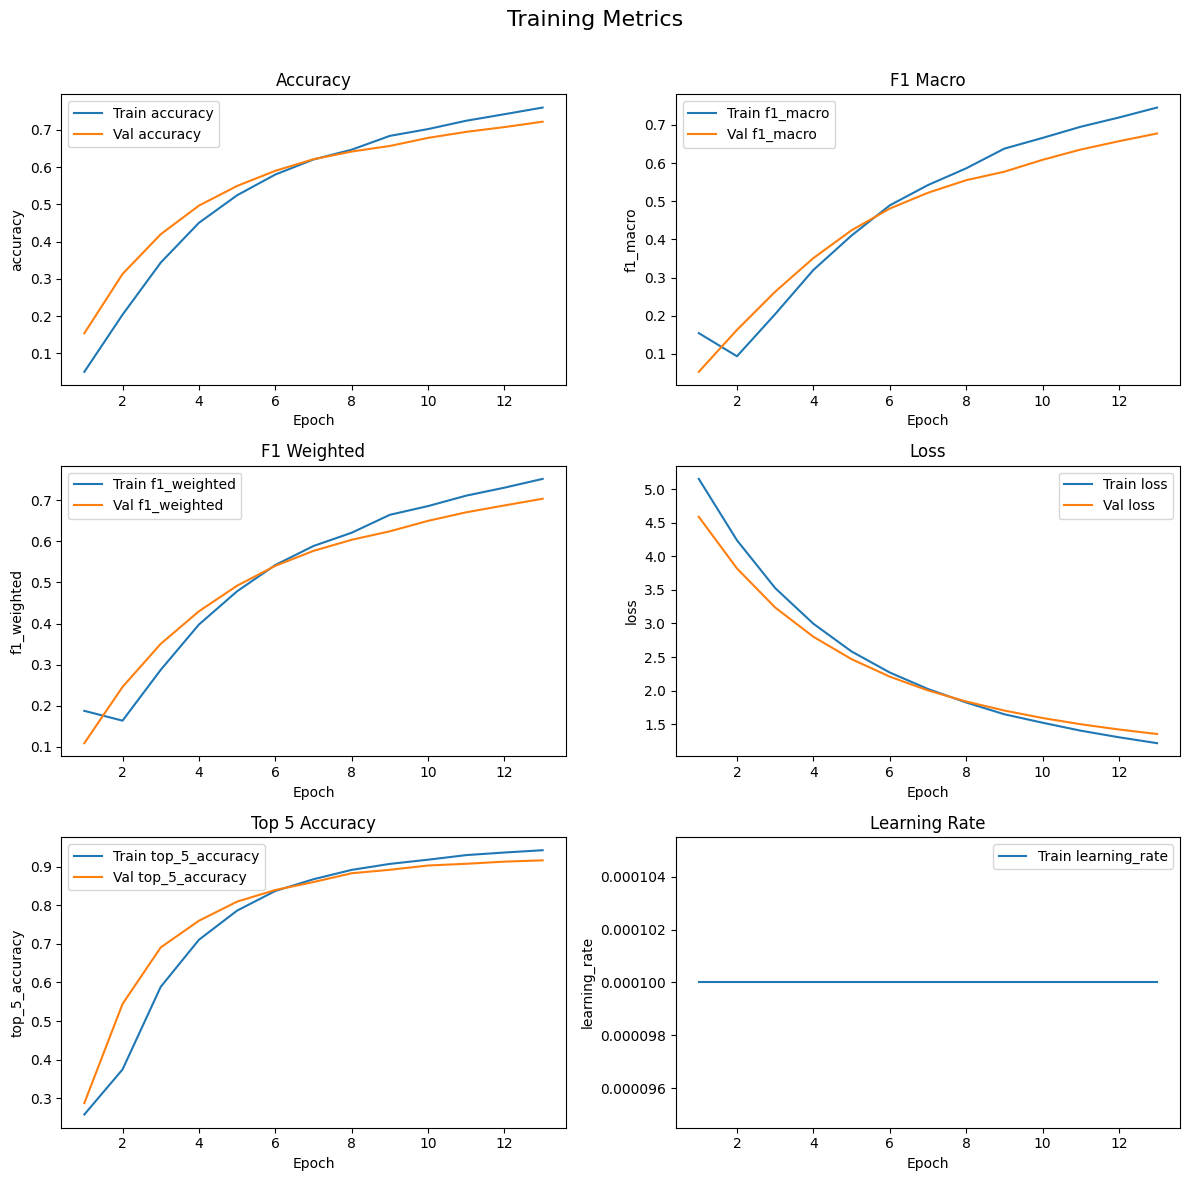

In [ ]:
plot_allmetrics(history_convnextdropout_batch64)

Evaluate on test

In [ ]:
y_true_test_convnextdropout_batch64 = []
y_pred_probs_test_convnextdropout_batch64 = []

for x_batch, y_batch in test_batch64:
    preds = model_convnextdropout_batch64.predict(x_batch, verbose=0)
    y_pred_probs_test_convnextdropout_batch64.append(preds)
    y_true_test_convnextdropout_batch64.append(y_batch.numpy())

y_true_test_convnextdropout_batch64 = np.concatenate(y_true_test_convnextdropout_batch64, axis=0)
y_pred_probs_test_convnextdropout_batch64 = np.concatenate(y_pred_probs_test_convnextdropout_batch64, axis=0)

In [ ]:
acc_test = compute_accuracy(y_true_test_convnextdropout_batch64, y_pred_probs_test_convnextdropout_batch64)
f1_macro_test = compute_f1_macro(y_true_test_convnextdropout_batch64, y_pred_probs_test_convnextdropout_batch64)
f1_weighted_test = compute_f1_weighted(y_true_test_convnextdropout_batch64, y_pred_probs_test_convnextdropout_batch64)
top5_acc_test = compute_top5_accuracy(y_true_test_convnextdropout_batch64, y_pred_probs_test_convnextdropout_batch64)

print(f"Test Accuracy: {acc_test:.4f}")
print(f"Test F1 Macro: {f1_macro_test:.4f}")
print(f"Test F1 Weighted: {f1_weighted_test:.4f}")
print(f"Test Top-5 Accuracy: {top5_acc_test:.4f}")

Test Accuracy: 0.7202
Test F1 Macro: 0.6772
Test F1 Weighted: 0.7020
Test Top-5 Accuracy: 0.9194


### ConvNextMid

In [ ]:
model_convnextmid_batch64, history_convnextmid_batch64 = ConvNextMid(n_classes, train_batch64, val_batch64, epochs=13, callbacks=callbacks_head)

Epoch 1/13
132/132 ━━━━━━━━━━━━━━━━━━━━ 71s 309ms/step - accuracy: 0.0354 - f1_macro: 0.2453 - f1_weighted: 0.3024 - loss: 5.6552 - top_5_accuracy: 0.4011 - val_accuracy: 0.2538 - val_f1_macro: 0.1068 - val_f1_weighted: 0.2226 - val_loss: 4.2830 - val_top_5_accuracy: 0.4012 - learning_rate: 1.0000e-04
Epoch 2/13
132/132 ━━━━━━━━━━━━━━━━━━━━ 23s 171ms/step - accuracy: 0.2509 - f1_macro: 0.1191 - f1_weighted: 0.2390 - loss: 3.9384 - top_5_accuracy: 0.4103 - val_accuracy: 0.4324 - val_f1_macro: 0.2615 - val_f1_weighted: 0.3776 - val_loss: 3.2378 - val_top_5_accuracy: 0.6372 - learning_rate: 1.0000e-04
Epoch 3/13
132/132 ━━━━━━━━━━━━━━━━━━━━ 23s 173ms/step - accuracy: 0.3989 - f1_macro: 0.2363 - f1_weighted: 0.3706 - loss: 3.0749 - top_5_accuracy: 0.5932 - val_accuracy: 0.5170 - val_f1_macro: 0.3506 - val_f1_weighted: 0.4591 - val_loss: 2.5706 - val_top_5_accuracy: 0.7357 - learning_rate: 1.0000e-04
Epoch 4/13
132/132 ━━━━━━━━━━━━━━━━━━━━ 23s 170ms/step - accuracy: 0.4939 - f1_macro: 0.344

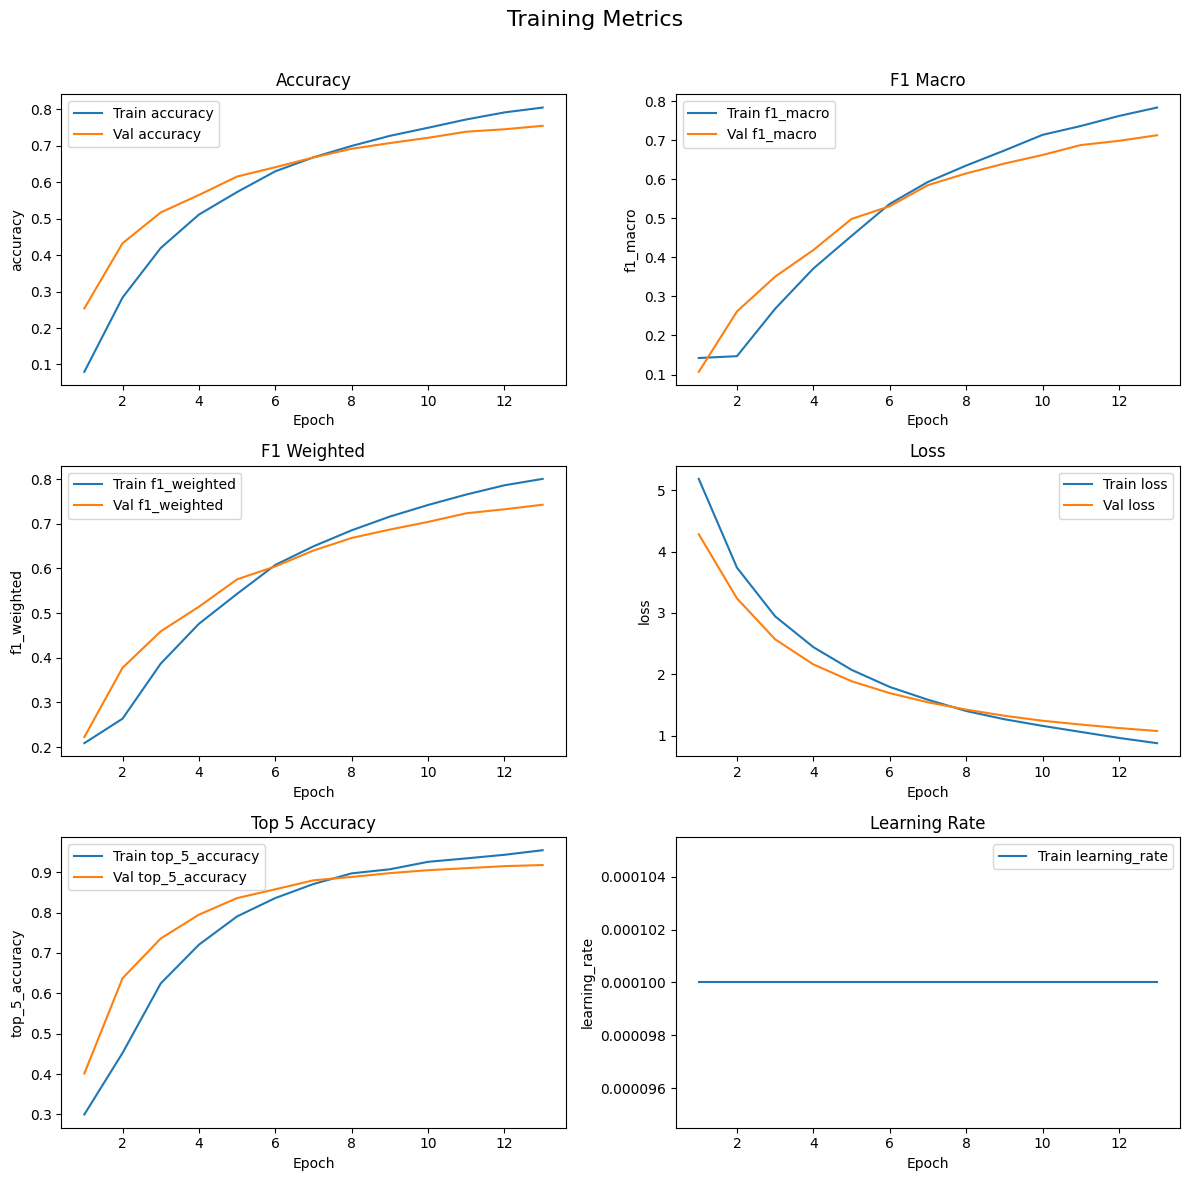

In [ ]:
plot_allmetrics(history_convnextmid_batch64)

Evaluate on test

In [ ]:
y_true_test_convnextmid_batch64 = []
y_pred_probs_test_convnextmid_batch64 = []

for x_batch, y_batch in test_batch64:
    preds = model_convnextmid_batch64.predict(x_batch, verbose=0)
    y_pred_probs_test_convnextmid_batch64.append(preds)
    y_true_test_convnextmid_batch64.append(y_batch.numpy())

y_true_test_convnextmid_batch64 = np.concatenate(y_true_test_convnextmid_batch64, axis=0)
y_pred_probs_test_convnextmid_batch64 = np.concatenate(y_pred_probs_test_convnextmid_batch64, axis=0)

In [ ]:
acc_test = compute_accuracy(y_true_test_convnextmid_batch64, y_pred_probs_test_convnextmid_batch64)
f1_macro_test = compute_f1_macro(y_true_test_convnextmid_batch64, y_pred_probs_test_convnextmid_batch64)
f1_weighted_test = compute_f1_weighted(y_true_test_convnextmid_batch64, y_pred_probs_test_convnextmid_batch64)
top5_acc_test = compute_top5_accuracy(y_true_test_convnextmid_batch64, y_pred_probs_test_convnextmid_batch64)

print(f"Test Accuracy: {acc_test:.4f}")
print(f"Test F1 Macro: {f1_macro_test:.4f}")
print(f"Test F1 Weighted: {f1_weighted_test:.4f}")
print(f"Test Top-5 Accuracy: {top5_acc_test:.4f}")

Test Accuracy: 0.7486
Test F1 Macro: 0.7026
Test F1 Weighted: 0.7369
Test Top-5 Accuracy: 0.9132


### ConvNextFull

In [ ]:
model_convnextfull_batch64, history_convnextfull_batch64 = ConvNextFull(n_classes, train_batch64, val_batch64, epochs=20, callbacks=callbacks_head)

Epoch 1/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 72s 310ms/step - accuracy: 0.0453 - f1_macro: 0.2574 - f1_weighted: 0.3225 - loss: 9.3339 - top_5_accuracy: 0.4072 - val_accuracy: 0.3322 - val_f1_macro: 0.1814 - val_f1_weighted: 0.3047 - val_loss: 7.4063 - val_top_5_accuracy: 0.5392 - learning_rate: 1.0000e-04
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 23s 170ms/step - accuracy: 0.2851 - f1_macro: 0.1392 - f1_weighted: 0.2745 - loss: 7.0741 - top_5_accuracy: 0.4483 - val_accuracy: 0.5320 - val_f1_macro: 0.3791 - val_f1_weighted: 0.4886 - val_loss: 6.0765 - val_top_5_accuracy: 0.7490 - learning_rate: 1.0000e-04
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 23s 172ms/step - accuracy: 0.4251 - f1_macro: 0.2679 - f1_weighted: 0.4032 - loss: 6.0735 - top_5_accuracy: 0.6389 - val_accuracy: 0.6060 - val_f1_macro: 0.4690 - val_f1_weighted: 0.5612 - val_loss: 5.2792 - val_top_5_accuracy: 0.8436 - learning_rate: 1.0000e-04
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 23s 173ms/step - accuracy: 0.5129 - f1_macro: 0.365

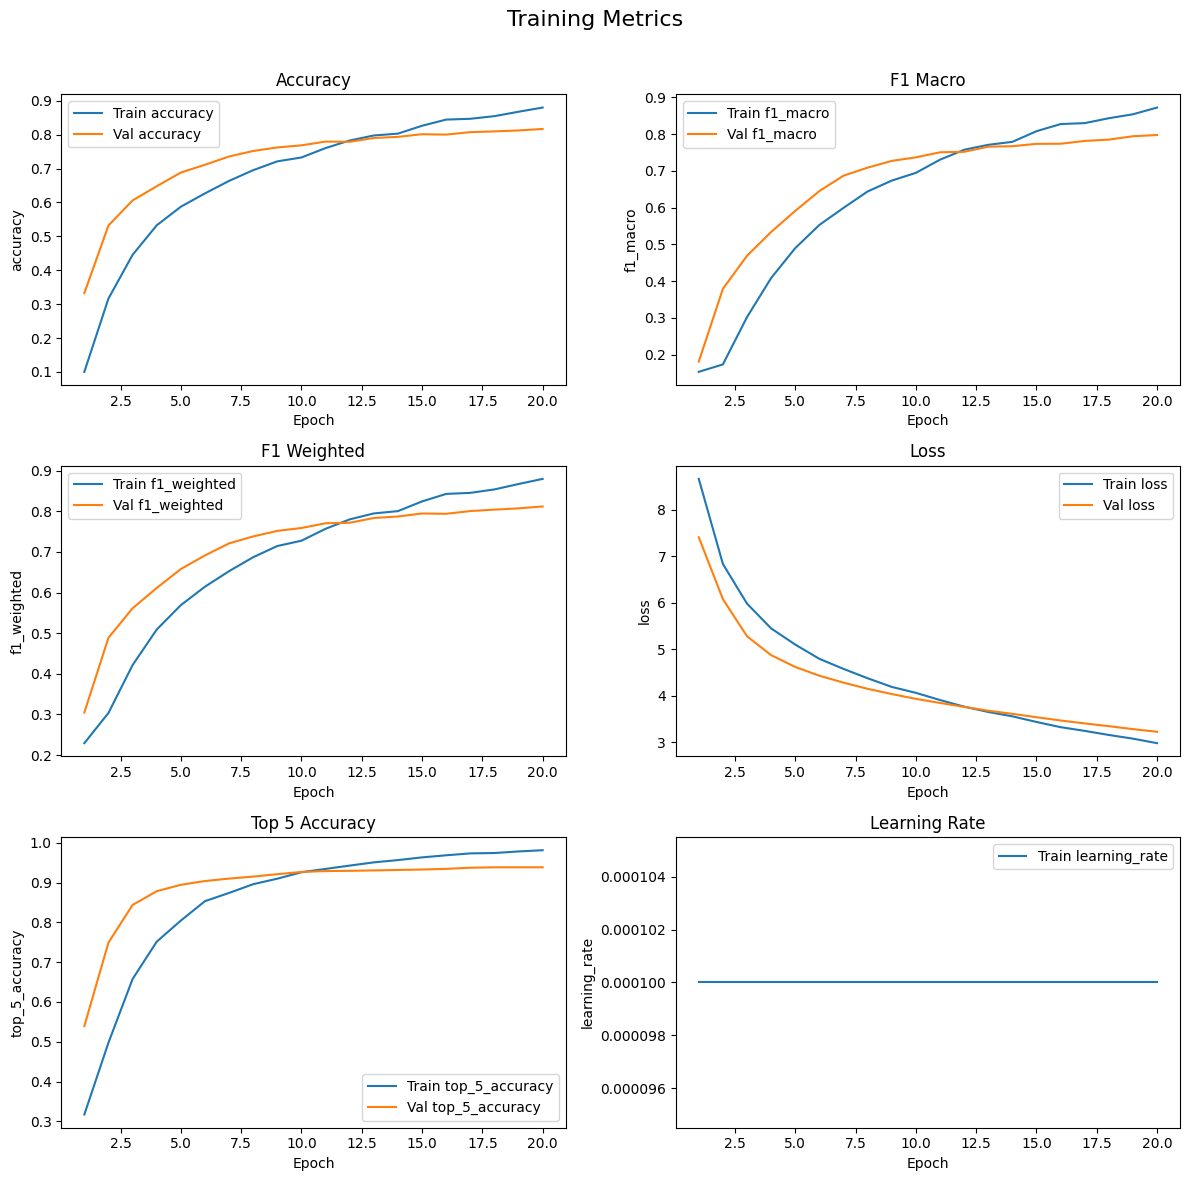

In [ ]:
plot_allmetrics(history_convnextfull_batch64)

Evaluate on test

In [ ]:
y_true_test_convnextfull_batch64 = []
y_pred_probs_test_convnextfull_batch64 = []

for x_batch, y_batch in test_batch64:
    preds = model_convnextfull_batch64.predict(x_batch, verbose=0)
    y_pred_probs_test_convnextfull_batch64.append(preds)
    y_true_test_convnextfull_batch64.append(y_batch.numpy())

y_true_test_convnextfull_batch64 = np.concatenate(y_true_test_convnextfull_batch64, axis=0)
y_pred_probs_test_convnextfull_batch64 = np.concatenate(y_pred_probs_test_convnextfull_batch64, axis=0)

In [ ]:
acc_test = compute_accuracy(y_true_test_convnextfull_batch64, y_pred_probs_test_convnextfull_batch64)
f1_macro_test = compute_f1_macro(y_true_test_convnextfull_batch64, y_pred_probs_test_convnextfull_batch64)
f1_weighted_test = compute_f1_weighted(y_true_test_convnextfull_batch64, y_pred_probs_test_convnextfull_batch64)
top5_acc_test = compute_top5_accuracy(y_true_test_convnextfull_batch64, y_pred_probs_test_convnextfull_batch64)

print(f"Test Accuracy: {acc_test:.4f}")
print(f"Test F1 Macro: {f1_macro_test:.4f}")
print(f"Test F1 Weighted: {f1_weighted_test:.4f}")
print(f"Test Top-5 Accuracy: {top5_acc_test:.4f}")

Test Accuracy: 0.8081
Test F1 Macro: 0.7866
Test F1 Weighted: 0.8034
Test Top-5 Accuracy: 0.9377


## Saving best Model and the respective History

In [20]:
#Saving the model's history

saving_path = "/content/drive/MyDrive/dl_run/ConvNext"

with open(f"{saving_path}/history_convnext_batch32_full.pkl", "wb") as f:
    pickle.dump(history_convnextfull_batch32, f)


In [21]:
#Saving the model

model_path = f"{saving_path}/model_convnextfull_batch32.keras"
model_convnextfull_batch32.save(model_path)